# Учебный проект 6_Линейные модели машинного обучения

## Содержание

* [Описание проекта](#описание-проекта)
* [Импорт библиотек Python и загрузка данных](#импорт-библиотек-python-и-загрузка-данных)
* [Предобработка данных](#предобработка-данных)
* [Исследовательский анализ данных](#исследовательский-анализ-данных)
* [Объединение данных](#объединение-данных)

## Описание проекта <a class = 'anchor' id = 'описание'></a>

На исследовании находятся данные `о текущем поголовье скота, родословной каждой коровы и список коров для будущей покупки`, которые были предоставлены фермером.

---

`Задача`

**Разработать модели машинного обучения для принятия решений о покупке коров на основании показателей**:

1. Средний удой коровы - **не менее 6 000 килограммов**;
2. **Молоко коров должно быть вкусным**.

---

`Путь решения`

Подготовить модели машинного обучения:
* Для прогнозирования удоя коровы - **модель линейной регрессии** (так как размер удоя - количественный показатель);
* Для прогнозирования вкуса молока - **модель логистической регрессии** (вкус молока - качественный показатель).

---

`Располагаемые данные`

**Данные о текущем состоянии стада - ferma_main**

* id - уникальный идентификатор коровы;
* Удой, кг — масса молока, которую корова даёт в год (в килограммах);
* ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы;
* Сырой протеин, г — содержание сырого протеина в корме (в граммах);
* СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы;
* Порода — порода коровы;
* Тип пастбища — ландшафт лугов, на которых паслась корова;
*порода папы_быка — порода папы коровы;
* Жирность,% — содержание жиров в молоке (в процентах);
* Белок,% — содержание белков в молоке (в процентах);
* Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно);
* Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

**Данные о родословной каждой коровы - ferma_dad**

* id — уникальный идентификатор коровы.;
* Имя Папы — имя папы коровы.

**Данные о списке коров для покупки - cow_buy**

* Порода — порода коровы;
* Тип пастбища — ландшафт лугов, на которых паслась корова;
* порода папы_быка — порода папы коровы;
* Имя_папы — имя папы коровы;
* Текущая_жирность,% — содержание жиров в молоке (в процентах);
* Текущий_уровень_белок,% — содержание белков в молоке (в процентах);
* Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

## Импорт библиотек Python и загрузка данных <a class = anchor id = 'Импорт'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Импорт библиотек Python:
    * для манипулирования данными;
    * для визуализации данных;
    * для решения задач машинного обучения.
2. Загрузка данных в рабочую среду Jupyter Notebook. Инициализация переменных в соответствие с названиями загружаемых датасетов: **ferma_main**, **ferma_dad**, **cow_buy**;
3. Вывод на экран параметров датасетов:
    * вывод общей структуры набора данных - демонстрация первых 5 строк;
    * общей информации о наборе данных;
4. Формирование вывода по итогам данного этапа.

In [179]:
# импорт библиотек python

# для манипулирования данными
import pandas as pd
import numpy as np

# для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# методы машинного обучения
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

In [180]:
# загрузка данных в рабочую среду
try:
    ferma_main = pd.read_csv('~/Desktop/YandexPraktikum_projects/datasets/ferma_main.csv', sep = ';') # основной набор данных о текущем состоянии стада
    ferma_dad = pd.read_csv('~/Desktop/YandexPraktikum_projects/datasets/ferma_dad.csv', sep = ';') # данные о родословной каждой коровы
    cow_buy = pd.read_csv('~/Desktop/YandexPraktikum_projects/datasets/cow_buy.csv', sep = ';') # данные о списке коров для покупки
except:
    ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep = ';')
    ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep = ';')
    cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep = ';')

In [181]:
# пользовательская функция для первичного изучения содержимого наборов данных
def  first_meeting (df : pd.DataFrame, df_name : str) -> None:
    print(f'Структура набора данных {df_name}')
    display(df.head())
    print()
    print(df.info())

# вывод на экран параметров датасетов
first_meeting(ferma_main, 'ferma_main')
first_meeting(ferma_dad, 'ferma_dad')
first_meeting(cow_buy, 'cow_buy')

Структура набора данных ferma_main


id  Удой, кг ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                  14,2              1743   
1   2      5529                                  12,8              2138   
2   3      5810                                    14              1854   
3   4      5895                                  12,4              2012   
4   5      5302                                  12,8              1675   

  СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0,89   Вис Бик Айдиал    Равнинное   
1                                 0,89   Вис Бик Айдиал    Равнинные   
2                                0,885  РефлешнСоверинг    Холмистое   
3                                0,885  РефлешнСоверинг    Холмистое   
4                                0,885   Вис Бик Айдиал    Равнинные   

  порода папы_быка Жирность,% Белок,% Вкус молока      Возраст  
0           Айдиал       3,58   3,076      вкусно  более_2_лет  
1          Соверин       3,54   3,079      вкусно  менее_2_лет  
2          Соверин       3,59   3,074   не вкусно  более_2_лет  
3           Айдиал        3,4   3,075   не вкусно  более_2_лет  
4          Соверин       3,73   3,073      вкусно  менее_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст           

id  Имя Папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB
None
Структура набора данных cow_buy


Порода Тип пастбища порода папы_быка  Имя_папы Текущая_жирность,%  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес               3,58   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный               3,54   
2  РефлешнСоверинг    равнинное          Соверин     Барин               3,59   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный                3,4   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный               3,64   

  Текущий_уровень_белок,%      Возраст  
0                   3,076  более_2_лет  
1                   3,081  менее_2_лет  
2                   3,074  более_2_лет  
3                   3,061  более_2_лет  
4                   3,074  более_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB
None


In [182]:
# вывод на экран статистической информации по наборам данных

print('Статистическая информация по набору ferma_main')
display(ferma_main.describe(include = 'all'))
print()
print('Статистическая информация по набору cow_buy')
display(cow_buy.describe(include = 'all'))

Статистическая информация по набору ferma_main


id      Удой, кг ЭКЕ (Энергетическая кормовая единица)  \
count   634.000000    634.000000                                   634   
unique         NaN           NaN                                    55   
top            NaN           NaN                                  14,7   
freq           NaN           NaN                                    27   
mean    317.460568   6187.025237                                   NaN   
std     183.096982   1638.401021                                   NaN   
min       1.000000   5204.000000                                   NaN   
25%     159.250000   5751.750000                                   NaN   
50%     317.500000   6130.500000                                   NaN   
75%     475.750000   6501.000000                                   NaN   
max     629.000000  45616.000000                                   NaN   

        Сырой протеин, г СПО (Сахаро-протеиновое соотношение)          Порода  \
count         634.000000                                  634             634   
unique               NaN                                   12               2   
top                  NaN                                 0,94  Вис Бик Айдиал   
freq                 NaN                                  172             373   
mean         1922.682965                                  NaN             NaN   
std           182.392548                                  NaN             NaN   
min          1660.000000                                  NaN             NaN   
25%          1772.250000                                  NaN             NaN   
50%          1880.500000                                  NaN             NaN   
75%          2058.750000                                  NaN             NaN   
max          2349.000000                                  NaN             NaN   

       Тип пастбища порода папы_быка Жирность,% Белок,% Вкус молока  \
count           634              634        634     634         634   
unique            3                3         50      15           2   
top       Холмистое          Соверин       3,72   3,076      вкусно   
freq            356              316        112     103         371   
mean            NaN              NaN        NaN     NaN         NaN   
std             NaN              NaN        NaN     NaN         NaN   
min             NaN              NaN        NaN     NaN         NaN   
25%             NaN              NaN        NaN     NaN         NaN   
50%             NaN              NaN        NaN     NaN         NaN   
75%             NaN              NaN        NaN     NaN         NaN   
max             NaN              NaN        NaN     NaN         NaN   

            Возраст  
count           634  
unique            2  
top     более_2_лет  
freq            524  
mean            NaN  
std             NaN  
min             NaN  
25%             NaN  
50%             NaN  
75%             NaN  
max             NaN


Статистическая информация по набору cow_buy


Порода Тип пастбища порода папы_быка Имя_папы  \
count                20           20               20       20   
unique                2            2                2        4   
top     РефлешнСоверинг    равнинное          Соверин   Буйный   
freq                 11           11               12        8   

       Текущая_жирность,% Текущий_уровень_белок,%      Возраст  
count                  20                      20           20  
unique                 12                      12            2  
top                  3,59                   3,074  более_2_лет  
freq                    3                       5           15

**Вывод**:
1. Импортированы библиотеки Python:
    * для манипулирования данными - **pandas, numpy**;
    * для визуализации данных - **matplotlib, seaborn**;
    * для решения задач машинного обучения - **sklearn**.
2. Проведена загрузка данных в рабочую среду Jupyter Notebook. Инициализированы переменные: `ferma_main`, `ferma_dad`, `cow_buy`;
3. Выведены на экран параметры датасетов:
    * общая структура наборов данных - демонстрация первых 5 строк;
    * общая информация о наборах данных;

**Вывод после первичного знакомства с данными**:

`ferma_main`
* **В таблице нет пропущенных значений** - вся информация о поголовье коров и их характеристиках доступна;
* Требуется явное приведение типов - **многие значения сохранены как тип object вместо float**. По этой причине на текущем этапе нельзя сделать выводы по количественным показателям;
* В таблице представлены коровы **2 разных пород**;
* Все коровы классифицированы по возрасту: **менее 2 лет**, **более 2 лет**;
* Породы пап быков представлены **3 разными видами**;
* Типы пастбищ - **3 разных типа**;
* Названия столбцов не удовлетворяют формату **snake_case** - необходимо выполнить переименование.

`rides`
* **В таблице нет пропущенных значений** - вся информация о поездках и их характеристиках доступна;
* **Среднее время поездки - 17.8 минут, Медианное время - 17.6 минут**. Характеристика **duration** не содержит **явных** выбросов;
* **Среднее расстояние - 3 070 метров, Медианное расстояние 3 133**. Характеристика **distance** не содержит **явных** выбросов;
* Необходимо явного преобразовать столбец **date** - привести к типу datetime;
* Названия столбцов полностью удовлетворяют формату **snake_case**.

`cow_buy`
* Таблица состоит из 20 строк - потенциальных коров для покупки;
* **В таблице нет пропущенных значений** - вся информация о поголовье коров и их характеристиках доступна;
* Требуется явное приведение типов - **многие значения сохранены как тип object вместо float**. По этой причине на текущем этапе нельзя сделать выводы по количественным показателям;
* В таблице представлены коровы **2 разных пород**;
* Все коровы классифицированы по возрасту: **менее 2 лет**, **более 2 лет**;
* Породы пап быков представлены **2 разными видами**;
* Типы пастбищ - **2 разных типа**.
* Названия столбцов не удовлетворяют формату **snake_case** - необходимо выполнить переименование.



## Предобработка данных <a class = 'anchor' id = 'предобработка'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Переименование столбцов датасетов в соответствие со стандартами 'snake_case';
2. Преобразование типов данных в **столбцах, подразумевающих количественные значения**. Преобразование значений из типа **object** в тип **float**:
    * `ferma_main`:
        * ЭКЕ (Энергетическая кормовая единица);
        * СПО (Сахаро-протеиновое соотношение);
        * Жирность,%;
        * Белок,%;
    * `cow_buy`:
        * Текущая_жирность,%;
        * Текущий_уровень_белок,%.
3. Дополнительная проверка наборов данных на наличие пустых значений;
4. Проверка наборов данных на наличие дубликатов:
    * Явные дубликаты;
    * Неявные дубликаты.
5. Формирование вывода по итогам этапа.

In [183]:
# приведение названий столбцов к формату 'snake_case'
ferma_main.columns = ['cow_id', 'yield', 'energy_unit', 'crude_protein', 'sugar_protein_ratio', 'breed_type', 'pasture_type', 'father_bull_breed', 'fats_content', 'protein_content', 'milk_taste', 'age']

ferma_dad.columns = ['cow_id', 'father_bull_name']

cow_buy.columns = ['breed_type', 'pasture_type', 'father_bull_breed', 'father_bull_name', 'current_fat_content', 'current_protein_content', 'age']

In [184]:
# проверка замены названий столбцов
for dataset in [ferma_main, ferma_dad, cow_buy]:
    for column in list(dataset.columns):
        print('* ' + column)
    print()

* cow_id
* yield
* energy_unit
* crude_protein
* sugar_protein_ratio
* breed_type
* pasture_type
* father_bull_breed
* fats_content
* protein_content
* milk_taste
* age

* cow_id
* father_bull_name

* breed_type
* pasture_type
* father_bull_breed
* father_bull_name
* current_fat_content
* current_protein_content
* age



In [185]:
# инициализация пользовательской функции по замене типов значений
def type_change(df : pd.DataFrame, columns : list):
    for column in columns:
        df[column] = df[column].str.replace(',', '.').astype(float)


# преобразование типов данных в 'ferma_main'
type_change(ferma_main, ['energy_unit', 'sugar_protein_ratio', 'fats_content', 'protein_content'])

# преобразование типов данных в 'cow_buy'
type_change(cow_buy, ['current_fat_content', 'current_protein_content'])

# проверка проведенных преобразований
print('Типы данных в датасете ferma_main')
display(ferma_main.dtypes)
print()
print('Типы данных в датасете cow_buy')
display(cow_buy.dtypes)

Типы данных в датасете ferma_main


cow_id                   int64
yield                    int64
energy_unit            float64
crude_protein            int64
sugar_protein_ratio    float64
breed_type              object
pasture_type            object
father_bull_breed       object
fats_content           float64
protein_content        float64
milk_taste              object
age                     object
dtype: object


Типы данных в датасете cow_buy


breed_type                  object
pasture_type                object
father_bull_breed           object
father_bull_name            object
current_fat_content        float64
current_protein_content    float64
age                         object
dtype: object

In [186]:
# ининциализация пользовательской функции проверки наборов данных на пустые значения
def check_missing_values(df : pd.DataFrame, df_name : str) -> None:
    print(f'Проверка датасета {df_name} на наличие пустых значений:')
    pivot_data = df.isnull().sum().to_frame().rename(columns = {0 : 'missing_values'})
    pivot_data['%_of_missing_values'] = round(pivot_data['missing_values'] * 100 / int(df.shape[0]), 2)
    display(pivot_data.sort_values(by = '%_of_missing_values', ascending=False))  

In [187]:
# проверка на пустые значения датасета 'ferma_main'
check_missing_values(ferma_main, 'ferma_main')

Проверка датасета ferma_main на наличие пустых значений:


missing_values  %_of_missing_values
cow_id                            0                  0.0
yield                             0                  0.0
energy_unit                       0                  0.0
crude_protein                     0                  0.0
sugar_protein_ratio               0                  0.0
breed_type                        0                  0.0
pasture_type                      0                  0.0
father_bull_breed                 0                  0.0
fats_content                      0                  0.0
protein_content                   0                  0.0
milk_taste                        0                  0.0
age                               0                  0.0

In [188]:
# проверка на пустые значения датасета 'ferma_dad'
check_missing_values(ferma_dad, 'ferma_dad')

Проверка датасета ferma_dad на наличие пустых значений:


missing_values  %_of_missing_values
cow_id                         0                  0.0
father_bull_name               0                  0.0

In [189]:
# проверка на пустые значения датасета 'ferma_dad'
check_missing_values(cow_buy, 'cow_buy')

Проверка датасета cow_buy на наличие пустых значений:


missing_values  %_of_missing_values
breed_type                            0                  0.0
pasture_type                          0                  0.0
father_bull_breed                     0                  0.0
father_bull_name                      0                  0.0
current_fat_content                   0                  0.0
current_protein_content               0                  0.0
age                                   0                  0.0

In [190]:
# инициализация пользовательской функции для проверки датасетов на наличие явных дубликатов
def check_duplicates(df : pd.DataFrame):
    print(f"Количество явных дубликатов: {df.duplicated().sum()}")
    if df.duplicated().sum() > 0:
        print("Явные дубликаты:")
        display(df[df.duplicated()])
    else:
        print("Явных дубликатов нет.")

In [191]:
# проверка датасета 'ferma_main' на дубликаты
check_duplicates(ferma_main)

Количество явных дубликатов: 5
Явные дубликаты:


cow_id  yield  energy_unit  crude_protein  sugar_protein_ratio  \
629     627   5970         14.4           1837                 0.88   
630     627   5970         14.4           1837                 0.88   
631     627   5970         14.4           1837                 0.88   
632     627   5970         14.4           1837                 0.88   
633     627   5970         14.4           1837                 0.88   

          breed_type pasture_type father_bull_breed  fats_content  \
629  РефлешнСоверинг    Холмистое           Соверин          3.64   
630  РефлешнСоверинг    Холмистое           Соверин          3.64   
631  РефлешнСоверинг    Холмистое           Соверин          3.64   
632  РефлешнСоверинг    Холмистое           Соверин          3.64   
633  РефлешнСоверинг    Холмистое           Соверин          3.64   

     protein_content milk_taste          age  
629            3.075  не вкусно  более_2_лет  
630            3.075  не вкусно  более_2_лет  
631            3.075  не вкусно  более_2_лет  
632            3.075  не вкусно  более_2_лет  
633            3.075  не вкусно  более_2_лет

In [192]:
# проверка датасета 'ferma_dad' на дубликаты
check_duplicates(ferma_dad)

Количество явных дубликатов: 0
Явных дубликатов нет.


In [193]:
# проверка датасета 'cow_buy' на дубликаты
check_duplicates(cow_buy)

Количество явных дубликатов: 4
Явные дубликаты:


breed_type pasture_type father_bull_breed father_bull_name  \
6    Вис Бик Айдиал    холмистое            Айдиал         Геркулес   
8   РефлешнСоверинг    равнинное           Соверин            Барин   
14  РефлешнСоверинг    равнинное           Соверин            Барин   
19  РефлешнСоверинг    равнинное            Айдиал           Буйный   

    current_fat_content  current_protein_content          age  
6                  3.58                    3.076  более_2_лет  
8                  3.59                    3.074  более_2_лет  
14                 3.59                    3.074  более_2_лет  
19                 3.64                    3.074  более_2_лет

**Вывод по промежуточному этапу**:

Обнаружены дубликаты в следующих датасетах:
    * `ferma_main`;
    * `cow_buy`.

Стоит отметить, что в датасете `ferma_main` строки являются полными дубликатами - их можно удалить встроенными методами pandas.

В датасете `cow_buy` дубликатами являются только 2 строки с индексами 8 и 14. Необходимо удалить только одну из них. **Остальные строки попали в дубликаты при технической ошибке**.

In [194]:
# сохранение изначального количества строк в наборах данных
ferma_main_rows = int(ferma_main.shape[0])
cow_buy_rows = int(cow_buy.shape[0])

# исключение дубликатов из набора данных 'ferma_main'
ferma_main = ferma_main.drop_duplicates(keep = 'first').reset_index(drop = True)
# исключение дубликатов из набора данных 'cow_buy'
cow_buy = cow_buy.drop(14, axis = 0).reset_index(drop = True)

# вывод на экран доли исключенных строк из наборов данных
print('Доля исключенных строк из набора ferma_main {:.2%}'.format(int(ferma_main_rows - int(ferma_main.shape[0])) / ferma_main_rows))
print('Доля исключенных строк из набора cow_buy {:.2%}'.format((cow_buy_rows - int(cow_buy.shape[0])) / cow_buy_rows))

Доля исключенных строк из набора ferma_main 0.79%
Доля исключенных строк из набора cow_buy 5.00%


In [195]:
# инициализация пользовательской функции для проверки наборов данных на наличие неявных дубликатов
def implicit_duplicates(df : pd.DataFrame):
    df = df.select_dtypes(include = 'object')
    for column in list(df.columns):
        print(f'Уникальные значения в столбце {column}:', df[column].unique())

In [196]:
# проверка датасета 'ferma_main' на наличие неявных дубликатов
implicit_duplicates(ferma_main)

Уникальные значения в столбце breed_type: ['Вис Бик Айдиал' 'РефлешнСоверинг']
Уникальные значения в столбце pasture_type: ['Равнинное' 'Равнинные' 'Холмистое']
Уникальные значения в столбце father_bull_breed: ['Айдиал' 'Соверин' 'Айдиалл']
Уникальные значения в столбце milk_taste: ['вкусно' 'не вкусно']
Уникальные значения в столбце age: ['более_2_лет' 'менее_2_лет']


In [197]:
# проверка датасета 'ferma_dad' на наличие неявных дубликатов
implicit_duplicates(ferma_dad)

Уникальные значения в столбце father_bull_name: ['Буйный' 'Соловчик' 'Барин' 'Геркулес']


In [198]:
# проверка датасета 'cow_buy' на наличие неявных дубликатов
implicit_duplicates(cow_buy)

Уникальные значения в столбце breed_type: ['Вис Бик Айдиал' 'РефлешнСоверинг']
Уникальные значения в столбце pasture_type: ['холмистое' 'равнинное']
Уникальные значения в столбце father_bull_breed: ['Айдиал' 'Соверин']
Уникальные значения в столбце father_bull_name: ['Геркулес' 'Буйный' 'Барин' 'Соловчик']
Уникальные значения в столбце age: ['более_2_лет' 'менее_2_лет']


**Вывод по промежуточному этапу**:

В датасете `ferma_main` обнаружены **неявные дубликаты**:
    * pasture_type - **Равнинное** и **Равнинные**;
    * father_bull_breed - **Айдиал** и **АйдиалЛ**;

Необходимо привести эти значения к эталонным из таблицы `cow_buy`.

Так же необходимо понизить регистр у всех значений типов object в наборах данных.

In [199]:
# инициализация пользовательской функции понижения регистра в значениях типа object в наборах данных
def lower_case(df : pd.DataFrame) -> pd.DataFrame:
    for column in list(df.select_dtypes(include = 'object').columns):
        df[column] = df[column].str.lower()
    return df

# понижение регистра в датасетах
ferma_main = lower_case(ferma_main)
ferma_dad = lower_case(ferma_dad)
cow_buy = lower_case(cow_buy)

In [200]:
# замена значений в датасете 'ferma_main'
ferma_main.loc[ferma_main['father_bull_breed'] == 'айдиалл', 'father_bull_breed'] = 'айдиал'
ferma_main.loc[ferma_main['pasture_type'] == 'равнинные', 'pasture_type'] = 'равнинное'

In [201]:
# проверка датасета 'ferma_main' на наличие неявных дубликатов
implicit_duplicates(ferma_main)

Уникальные значения в столбце breed_type: ['вис бик айдиал' 'рефлешнсоверинг']
Уникальные значения в столбце pasture_type: ['равнинное' 'холмистое']
Уникальные значения в столбце father_bull_breed: ['айдиал' 'соверин']
Уникальные значения в столбце milk_taste: ['вкусно' 'не вкусно']
Уникальные значения в столбце age: ['более_2_лет' 'менее_2_лет']


In [202]:
# проверка датасета 'cow_buy' на наличие неявных дубликатов
implicit_duplicates(cow_buy)

Уникальные значения в столбце breed_type: ['вис бик айдиал' 'рефлешнсоверинг']
Уникальные значения в столбце pasture_type: ['холмистое' 'равнинное']
Уникальные значения в столбце father_bull_breed: ['айдиал' 'соверин']
Уникальные значения в столбце father_bull_name: ['геркулес' 'буйный' 'барин' 'соловчик']
Уникальные значения в столбце age: ['более_2_лет' 'менее_2_лет']


**Вывод**:

1. Названия столбцов датасетов приведены к соответствию стандартам 'snake_case';
2. Преобразованы типы данных в **столбцах, подразумевающих количественные значения**. Преобразованы значения из типа **object** в тип **float**:
    * `ferma_main`:
        * ЭКЕ (Энергетическая кормовая единица);
        * СПО (Сахаро-протеиновое соотношение);
        * Жирность,%;
        * Белок,%;
    * `cow_buy`:
        * Текущая_жирность,%;
        * Текущий_уровень_белок,%.
3. Произведена дополнительная проверка наборов данных на наличие пустых значений. **Пустые значения в наборах данных отсутствуют**;
4. Проверка наборов данных на наличие дубликатов:
    * Исключены из наборов `ferma_main` и `cow_buy` строки, являвшиеся дубликатами;
    * Исключены неявные дубликаты из набора `ferma_main`.
5. Данные готовы к последующим шагам исследования.

## Исследовательский анализ данных <a class = 'anchor' id = 'исследование'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Вывод на экран основной статистической информации по текущим версиям наборов данных;
2. Исследование распределения количественных показателей наборов. Построение **гистограмм распределения значений**;
3. Исследование качественных показателей в следующем контексте:
    * Соотношение коров в разрезе возраста;
    * Соотношение коров в разрезе быков-отцов;
    * Соотношение коров, дающих ВКУСНОЕ молоко, в разрезе быков-отцов;
    * Соотношение коров в разрезе пород;
    * Соотношение коров, дающих ВКУСНОЕ молоко, в разрезе пород;
    * Соотношение коров, дающих ВКУСНОЕ молоко, в разрезе типов пастбищ;
4. Формирование вывода по итогам этапа.

In [203]:
# вывод на экран основных статистик по набору 'ferma_main'
ferma_main.describe().T

count         mean          std       min       25%  \
cow_id               629.0   315.000000   181.720940     1.000   158.000   
yield                629.0  6188.750397  1644.795489  5204.000  5751.000   
energy_unit          629.0    14.543879     1.306408    10.900    13.500   
crude_protein        629.0  1923.364070   182.956251  1660.000  1771.000   
sugar_protein_ratio  629.0     0.913116     0.032203     0.840     0.890   
fats_content         629.0     3.603657     0.168656     2.990     3.590   
protein_content      629.0     3.075671     0.002549     3.069     3.074   

                          50%       75%        max  
cow_id                315.000   472.000    629.000  
yield                6133.000  6501.000  45616.000  
energy_unit            14.700    15.600     16.800  
crude_protein        1888.000  2062.000   2349.000  
sugar_protein_ratio     0.930     0.940      0.960  
fats_content            3.650     3.720      3.750  
protein_content         3.076     3.077      3.085

In [204]:
# вывод на экран основных статистик по набору 'ferma_main'
cow_buy.describe().T

count      mean       std    min    25%    50%  \
current_fat_content       19.0  3.576842  0.130258  3.340  3.480  3.590   
current_protein_content   19.0  3.069263  0.010566  3.046  3.063  3.074   

                           75%    max  
current_fat_content      3.660  3.770  
current_protein_content  3.076  3.081

**Вывод по промежуточному этапу**:

Набор `ferma_main` характеризуется следующими статистическими показателями:

* **yield - удой, кг**:
    * Среднее значение - 6 189;
    * Минимальное значение - 5 204;
    * Максимальное значение - 45 616 (в наборе данных обнаружен явных выброс);
    * Стандартное отклонение - 1 644.8.
* **energy_unit - ЭКЕ (Энергетическая кормовая единица)**:
    * Среднее значение - 14.5;
    * Минимальное значение - 10.9;
    * Максимальное значение - 16.8;
    * Стандартное отклонение - 1.3. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.
* **crude_protein - Сырой протеин, г**:
    * Среднее значение - 1 923.4;
    * Минимальное значение - 1 660;
    * Максимальное значение - 2 349;
    * Стандартное отклонение - 183. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.
* **sugar_protein_ratio - СПО (Сахаро-протеиновое соотношение)**:
    * Среднее значение - 0.91;
    * Минимальное значение - 0.84;
    * Максимальное значение - 0.96;
    * Стандартное отклонение - 0.03. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.
* **fats_content - Жирность,%**:
    * Среднее значение - 3.6;
    * Минимальное значение - 3.0;
    * Максимальное значение - 3.75;
    * Стандартное отклонение - 0.17. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.
* **protein_content - Белок,%**:
    * Среднее значение - 3.076;
    * Минимальное значение - 3.069;
    * Максимальное значение - 3.085;
    * Стандартное отклонение - 0.003. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.


Набор `cow_buy` характеризуется следующими статистическими показателями:

* **current_fat_content - текущее содержание жиров**:
    * Среднее значение - 3.6;
    * Минимальное значение - 3.05;
    * Максимальное значение - 3.081;
    * Стандартное отклонение - 0.13. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.
* **current_protein_content - текущее содержание белка**:
    * Среднее значение - 3.07;
    * Минимальное значение - 3.046;
    * Максимальное значение - 3.081;
    * Стандартное отклонение - 0.01. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.

In [205]:
# инициализация пользовательской функции по построению гистограмм по передаваемым метрикам
def histogram_plotting(data: pd.DataFrame, feature : str, bins: int, x_size: int, y_size: int, feature_xlabel : str):
    # вычисление статистических метрик для дальнейшей визуализации
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    upper_bound = q3 + 1.5 * (q3 - q1)
    lower_bound = q1 - 1.5 * (q3 - q1)

    # построение визуализации
    plt.figure(figsize = (x_size, y_size))
    plt.hist(data[feature], color = 'blue', edgecolor = 'white', bins = bins)
    plt.axvline(upper_bound, c = 'red', ls = '-', label = 'верхняя граница допустимых значений')
    plt.axvline(q3, c = 'red', ls = '--', label = '3 квартиль значений')
    plt.axvline(q1, c = 'black', ls = '--', label = '1 квартиль значений')
    plt.axvline(lower_bound, c = 'black', ls = '-', label = 'нижняя граница допустимых значений')
    plt.title(f'Гистограмма распределения значений по метрике: {feature_xlabel}', fontsize = 10)
    plt.xlabel(feature_xlabel)
    plt.ylabel('Количество значений по метрике')
    plt.legend()
    plt.show()

    # вывод статистических метрик на экран
    print('Верхняя допустимая граница значений:', upper_bound)
    print('Нижняя допустимая граница значений:', lower_bound)
    print('Медианное значение:', data[feature].median())
    print('Среднее значение:', round(data[feature].mean(), 2))

    # расчет доли аномальных значений по метрике
    print('Доля значений, выходящих за верхнюю границу: {:.2%}'.format(data[data[feature] > upper_bound].shape[0] / data[feature].shape[0]))
    print('Доля значений, выходящих за нижнюю границу: {:.2%}'.format(data[data[feature] < lower_bound].shape[0] / data[feature].shape[0]))

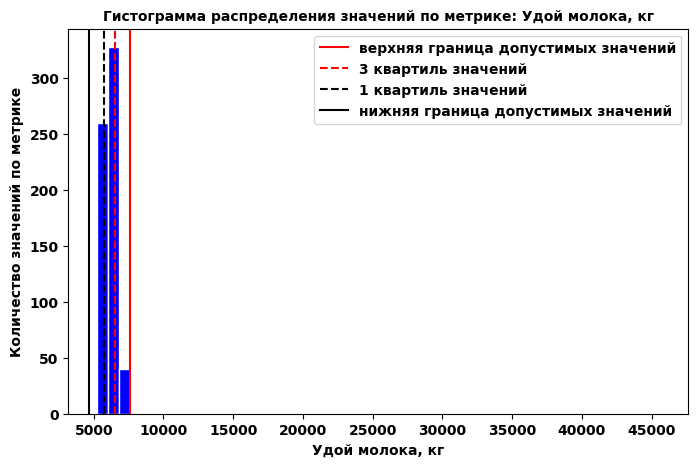

Верхняя допустимая граница значений: 7626.0
Нижняя допустимая граница значений: 4626.0
Медианное значение: 6133.0
Среднее значение: 6188.75
Доля значений, выходящих за верхнюю границу: 0.16%
Доля значений, выходящих за нижнюю границу: 0.00%


In [206]:
# построение визуализации по набору 'ferma_main' - характеристика "удой"
histogram_plotting(ferma_main, 'yield', 50, 8, 5, 'Удой молока, кг')

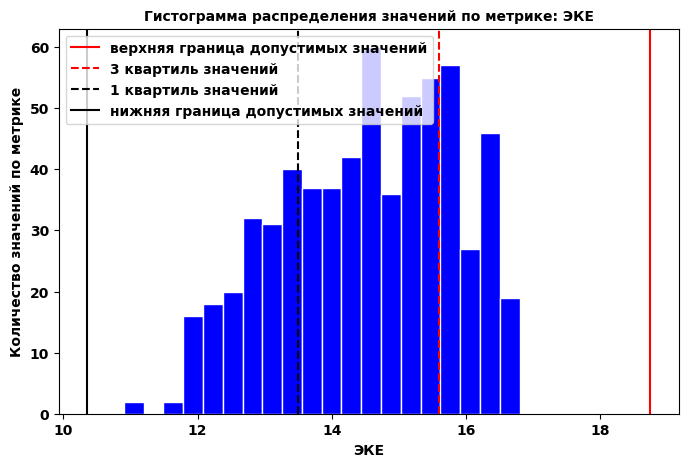

Верхняя допустимая граница значений: 18.75
Нижняя допустимая граница значений: 10.350000000000001
Медианное значение: 14.7
Среднее значение: 14.54
Доля значений, выходящих за верхнюю границу: 0.00%
Доля значений, выходящих за нижнюю границу: 0.00%


In [207]:
# построение визуализации по набору 'ferma_main' - характеристика "ЭКЕ"
histogram_plotting(ferma_main, 'energy_unit', 20, 8, 5, 'ЭКЕ')

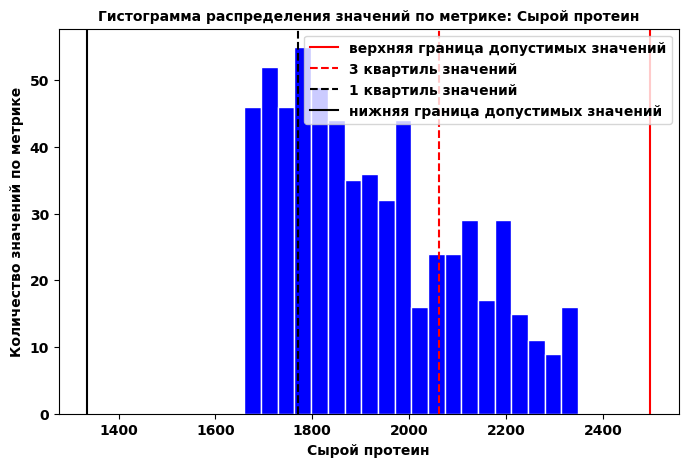

Верхняя допустимая граница значений: 2498.5
Нижняя допустимая граница значений: 1334.5
Медианное значение: 1888.0
Среднее значение: 1923.36
Доля значений, выходящих за верхнюю границу: 0.00%
Доля значений, выходящих за нижнюю границу: 0.00%


In [208]:
# построение визуализации по набору 'ferma_main' - характеристика "Сырой протеин"
histogram_plotting(ferma_main, 'crude_protein', 20, 8, 5, 'Сырой протеин')

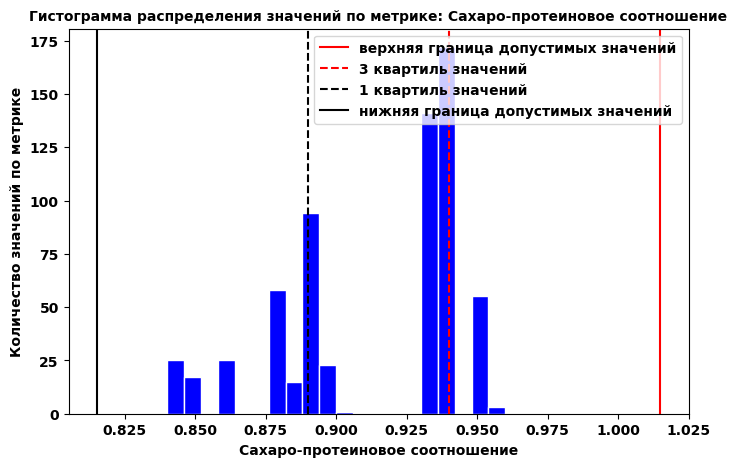

Верхняя допустимая граница значений: 1.015
Нижняя допустимая граница значений: 0.8150000000000002
Медианное значение: 0.93
Среднее значение: 0.91
Доля значений, выходящих за верхнюю границу: 0.00%
Доля значений, выходящих за нижнюю границу: 0.00%


In [209]:
# построение визуализации по набору 'ferma_main' - характеристика "Сахаро-протеиновое соотношение"
histogram_plotting(ferma_main, 'sugar_protein_ratio', 20, 8, 5, 'Сахаро-протеиновое соотношение')

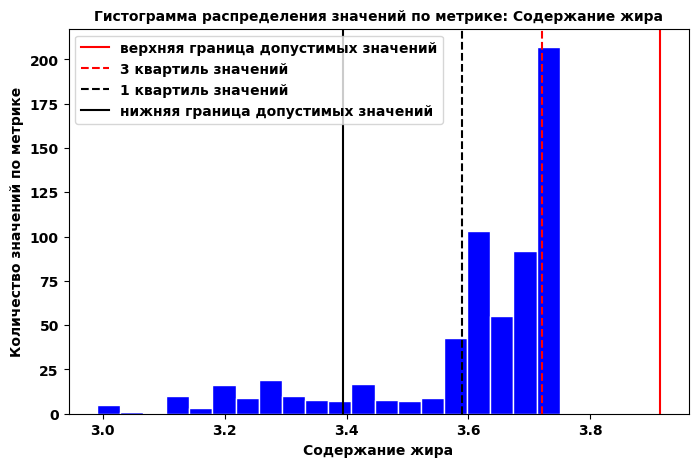

Верхняя допустимая граница значений: 3.915000000000001
Нижняя допустимая граница значений: 3.3949999999999996
Медианное значение: 3.65
Среднее значение: 3.6
Доля значений, выходящих за верхнюю границу: 0.00%
Доля значений, выходящих за нижнюю границу: 13.83%


In [210]:
# построение визуализации по набору 'ferma_main' - характеристика "Содержание жира"
histogram_plotting(ferma_main, 'fats_content', 20, 8, 5, 'Содержание жира')

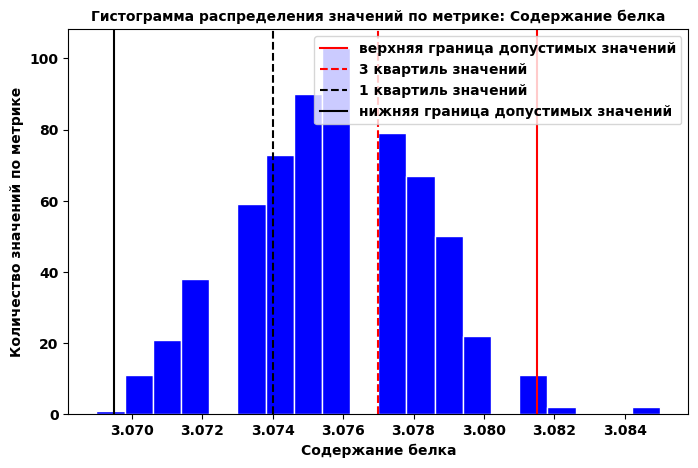

Верхняя допустимая граница значений: 3.0815
Нижняя допустимая граница значений: 3.0694999999999997
Медианное значение: 3.076
Среднее значение: 3.08
Доля значений, выходящих за верхнюю границу: 0.64%
Доля значений, выходящих за нижнюю границу: 0.16%


In [211]:
# построение визуализации по набору 'ferma_main' - характеристика "Содержание белка"
histogram_plotting(ferma_main, 'protein_content', 20, 8, 5, 'Содержание белка')

**Вывод по промежуточному этапу**:

Гистограммы подтверждают сформированные выводы на этапе вывод основных описательных статистик.

Необходимо исключить из набора данных `ferma_main` аномально большие показатели удоя молока.

In [212]:
# фильтрование аномально больших значений в наборе 'ferma_main' по признаку yield
ferma_main = ferma_main[ferma_main['yield'] <= (ferma_main['yield'].quantile(0.75)
                                                + 1.5 * (ferma_main['yield'].quantile(0.75) - ferma_main['yield'].quantile(0.25)))].reset_index(drop = True)

# вывод статистик по параметру yield
ferma_main['yield'].describe()

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: yield, dtype: float64

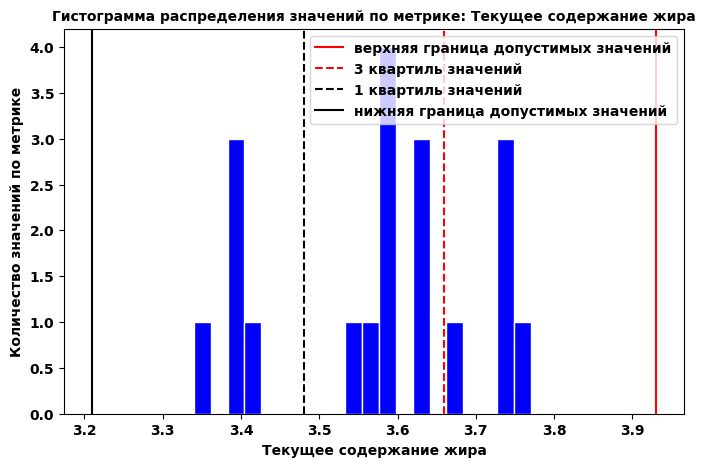

Верхняя допустимая граница значений: 3.9300000000000006
Нижняя допустимая граница значений: 3.21
Медианное значение: 3.59
Среднее значение: 3.58
Доля значений, выходящих за верхнюю границу: 0.00%
Доля значений, выходящих за нижнюю границу: 0.00%


In [213]:
# построение визуализации по набору 'cow_buy' - характеристика "Содержание жира"
histogram_plotting(cow_buy, 'current_fat_content', 20, 8, 5, 'Текущее содержание жира')

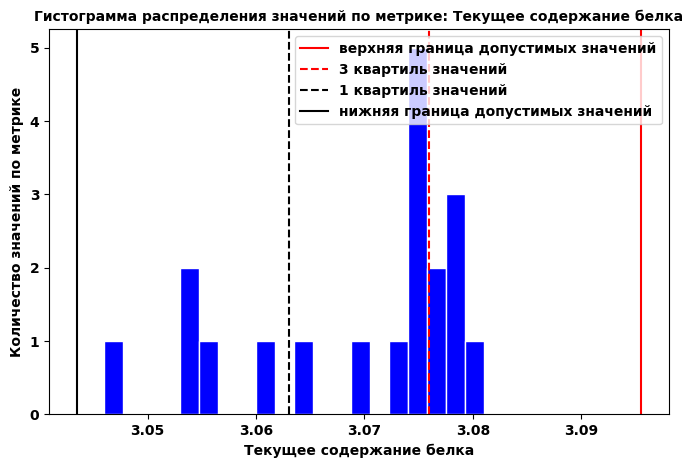

Верхняя допустимая граница значений: 3.0955000000000004
Нижняя допустимая граница значений: 3.043499999999999
Медианное значение: 3.074
Среднее значение: 3.07
Доля значений, выходящих за верхнюю границу: 0.00%
Доля значений, выходящих за нижнюю границу: 0.00%


In [214]:
# построение визуализации по набору 'cow_buy' - характеристика "Содержание белка"
histogram_plotting(cow_buy, 'current_protein_content', 20, 8, 5, 'Текущее содержание белка')

In [215]:
# объединение данных перед дальнейшим построением визуализации
full_ferma_data = ferma_main.merge(ferma_dad, how = 'left', on = 'cow_id')

# проверка полученного набора данных на наличие пустых значений
check_missing_values(full_ferma_data, 'full_ferma_data')

Проверка датасета full_ferma_data на наличие пустых значений:


missing_values  %_of_missing_values
cow_id                            0                  0.0
yield                             0                  0.0
energy_unit                       0                  0.0
crude_protein                     0                  0.0
sugar_protein_ratio               0                  0.0
breed_type                        0                  0.0
pasture_type                      0                  0.0
father_bull_breed                 0                  0.0
fats_content                      0                  0.0
protein_content                   0                  0.0
milk_taste                        0                  0.0
age                               0                  0.0
father_bull_name                  0                  0.0

In [216]:
# вывод на экран структуры полученного датасета
full_ferma_data.head()

cow_id  yield  energy_unit  crude_protein  sugar_protein_ratio  \
0       1   5863         14.2           1743                0.890   
1       2   5529         12.8           2138                0.890   
2       3   5810         14.0           1854                0.885   
3       4   5895         12.4           2012                0.885   
4       5   5302         12.8           1675                0.885   

        breed_type pasture_type father_bull_breed  fats_content  \
0   вис бик айдиал    равнинное            айдиал          3.58   
1   вис бик айдиал    равнинное           соверин          3.54   
2  рефлешнсоверинг    холмистое           соверин          3.59   
3  рефлешнсоверинг    холмистое            айдиал          3.40   
4   вис бик айдиал    равнинное           соверин          3.73   

   protein_content milk_taste          age father_bull_name  
0            3.076     вкусно  более_2_лет           буйный  
1            3.079     вкусно  менее_2_лет         соловчик  
2            3.074  не вкусно  более_2_лет            барин  
3            3.075  не вкусно  более_2_лет           буйный  
4            3.073     вкусно  менее_2_лет            барин

In [217]:
# инициализация пользовательской функции по формированию вывода информации

def display_info(df: pd.DataFrame, column_name: str, title: str, xlabel: str, ylabel: str, kind_of_plot : str):
# построение визуализации по выбранной метрике
    plt.title(title, fontsize = 12)
    if kind_of_plot == 'pie':
        (df[column_name]
         .value_counts()
         .sort_values(ascending=True)
         .plot(kind = kind_of_plot, figsize = (8, 5), autopct='%1.0f%%'))
    else:
        (df[column_name]
         .value_counts()
         .sort_values(ascending=True)
         .plot(kind = kind_of_plot, figsize = (8, 5)))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# построение сводной таблицы по выбранной метрике
    pivot_data = (df[column_name]
                  .value_counts()
                  .sort_values(ascending=False)
                  .to_frame())
    pivot_data['share_of_cows'] = round(pivot_data['count'] / pivot_data['count'].sum() * 100, 2)
    pivot_data.columns = ['count_of_cows', 'share_of_cows']
    display(pivot_data)

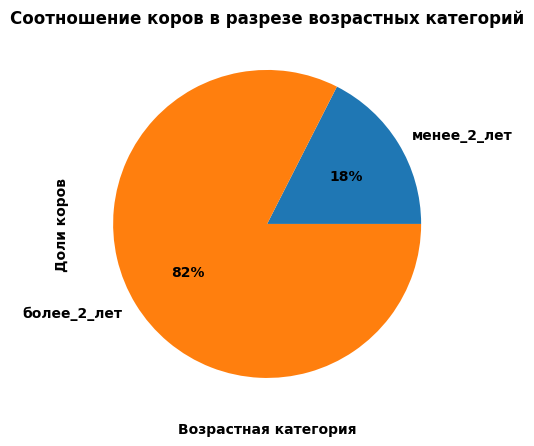

count_of_cows  share_of_cows
age                                      
более_2_лет            518          82.48
менее_2_лет            110          17.52

In [218]:
# вывод на экран визуализации по соотношению коров в разрезе возраста
display_info(full_ferma_data, 'age', 'Соотношение коров в разрезе возрастных категорий', 'Возрастная категория', 'Доли коров', 'pie')

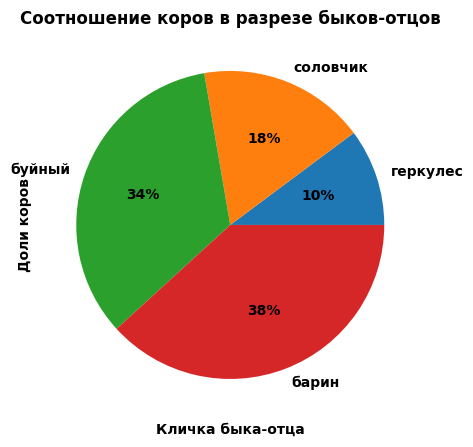

count_of_cows  share_of_cows
father_bull_name                              
барин                       240          38.22
буйный                      214          34.08
соловчик                    110          17.52
геркулес                     64          10.19

In [219]:
# вывод на экран визуализации по соотношению коров в разрезе быков-отцов
display_info(full_ferma_data, 'father_bull_name', 'Соотношение коров в разрезе быков-отцов', 'Кличка быка-отца', 'Доли коров', 'pie')

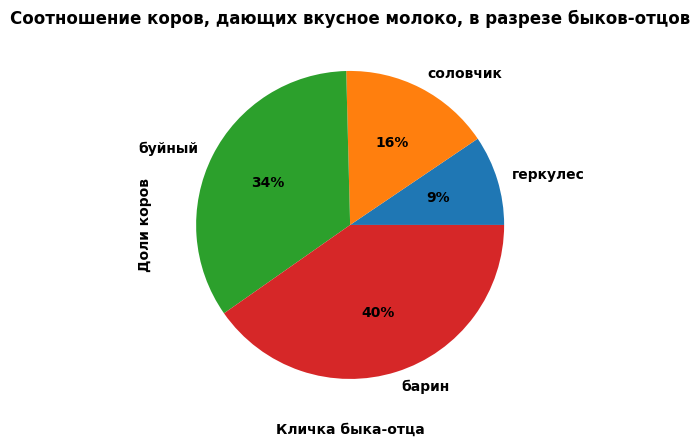

count_of_cows  share_of_cows
father_bull_name                              
барин                       149          40.27
буйный                      127          34.32
соловчик                     59          15.95
геркулес                     35           9.46

In [220]:
# вывод на экран визуализации по соотношению коров, дающих вкусное молоко, в разрезе быков-отцов
display_info(full_ferma_data.query('milk_taste == "вкусно"'), 'father_bull_name', 'Соотношение коров, дающих вкусное молоко, в разрезе быков-отцов', 'Кличка быка-отца', 'Доли коров', 'pie')

In [221]:
# формирование свода по коровам со вкусным молоков в разрезе быков-отцов
tasty_milk_pivot = full_ferma_data[full_ferma_data['milk_taste'] == 'вкусно'].groupby('father_bull_name').agg({'cow_id' : 'count'}).rename(columns = {'cow_id':'tasty_milk_cows'})

# формирование свода по всем коровам в разрезе быков-отцов
milk_pivot = full_ferma_data.groupby('father_bull_name').agg({'cow_id' : 'count'}).rename(columns = {'cow_id':'all_cows'})

# формирование общего свода
full_milk_pivot = tasty_milk_pivot.join(milk_pivot)
full_milk_pivot['%_of_tasty_milk'] = round(full_milk_pivot['tasty_milk_cows'] * 100 / full_milk_pivot['all_cows'], 2)
display(full_milk_pivot.sort_values(by = '%_of_tasty_milk', ascending = False))

tasty_milk_cows  all_cows  %_of_tasty_milk
father_bull_name                                            
барин                         149       240            62.08
буйный                        127       214            59.35
геркулес                       35        64            54.69
соловчик                       59       110            53.64

**Вывод по промежуточному этапу**:

* Текущий состав стада представлен в основном возрастными коровами:
    * **Коровы, которым более 2 лет - 82%** от текущего стада;
    * **Коровы, которым менее 2 лет - 18%** от текущего стада.
* **Порядка 72% коров из текущего стада** произошли от двух быков-отцов - **Барин** и **Буйный**:
    * **38% стада - от Барина**;
    * **34% стада - от Буйного**.
* Исходя от общего количества коров, полученных от Буйного и Барина, эти быки отцы являются лидерами в потомстве, которое дает вкусное молоко:
    * **40% от общего числа коров, которые дают вкусное молоко, произошли от Барина**;
    * **34% от общего числа коров, которые дают вкусное молоко, произошли от Буйного**.
* Соотношение коров, которые дают вкусное молоко, и всех коров, которые произошли от одного быка-отца примерно одинаковое у всех четырех быков - от 54% до 62%:
    * В таком разрезе лидером все равно остается **Барин - 62% коров, которые произошли от этого быка, дают вкусное молоко**.

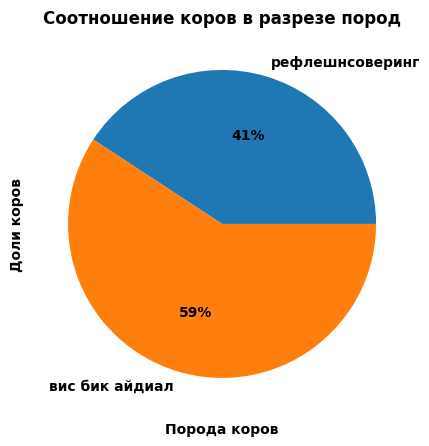

count_of_cows  share_of_cows
breed_type                                   
вис бик айдиал             372          59.24
рефлешнсоверинг            256          40.76

In [222]:
# вывод на экран визуализации по соотношению коров в разрезе пород
display_info(full_ferma_data, 'breed_type', 'Соотношение коров в разрезе пород', 'Порода коров', 'Доли коров', 'pie')

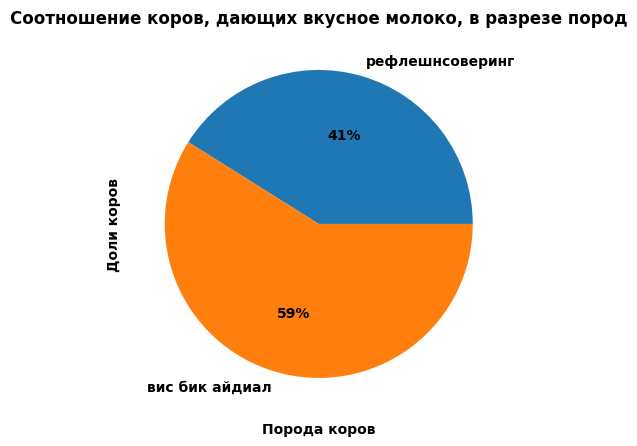

count_of_cows  share_of_cows
breed_type                                   
вис бик айдиал             218          58.92
рефлешнсоверинг            152          41.08

In [223]:
# вывод на экран визуализации по соотношению коров, дающих вкусное молоко, в разрезе пород
display_info(full_ferma_data.query('milk_taste == "вкусно"'), 'breed_type', 'Соотношение коров, дающих вкусное молоко, в разрезе пород', 'Порода коров', 'Доли коров', 'pie')

**Вывод по промежуточному этапу**:

* **Соотношение текущего стада по типу пород**:
    * 59% коров представлены породой "Вис Бик Айдиал";
    * 41% коров представлены породой "РефлешнСоверинг".
* **Соотношение текущего стада при условии, что корова дает вкусное молоко**:
    * 59% коров представлены породой "Вис Бик Айдиал";
    * 41% коров представлены породой "РефлешнСоверинг".

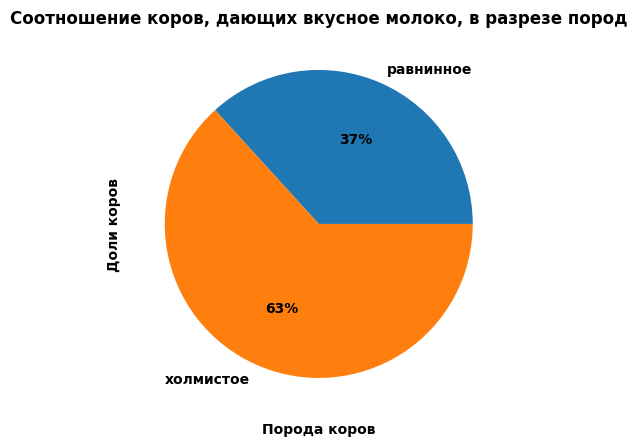

count_of_cows  share_of_cows
pasture_type                              
холмистое               234          63.24
равнинное               136          36.76

In [224]:
# вывод на экран визуализации по соотношению коров, дающих вкусное молоко, в разрезе типа пастбища
display_info(full_ferma_data.query('milk_taste == "вкусно"'), 'pasture_type', 'Соотношение коров, дающих вкусное молоко, в разрезе пород', 'Порода коров', 'Доли коров', 'pie')

**Вывод по промежуточному этапу**:

**В большинстве своем коровы, которые дают вкусное молоко, пасутся на холмистых пастбищах**:
* 63% - холмистые;
* 37% - равнинные.

**Вывод**:

1. Выведена на экран основная статистическая информация по текущим версиям наборов данных. Описаны основные выводы для дальнейшего анализа количественных и качественных признаков;
2. Построены **гистограммы распределения значений** для количественных признаков. На основании полученных визуализаций были обнаружены аномальные значения в данных - признак **yield** датасет `ferma_main`. **Аномальные значения исключены из набора**;
3. Проведено исследование качественных показателей в следующем контексте:
    * Соотношение коров в разрезе возраста:
        * Текущий состав стада представлен в основном возрастными коровами:
            * **Коровы, которым более 2 лет - 82%** от текущего стада;
            * **Коровы, которым менее 2 лет - 18%** от текущего стада.
    * Соотношение коров в разрезе быков-отцов:
        * **Порядка 72% коров из текущего стада** произошли от двух быков-отцов - **Барин** и **Буйный**:
            * **38% стада - от Барина**;
            * **34% стада - от Буйного**.
    * Соотношение коров, дающих ВКУСНОЕ молоко, в разрезе быков-отцов:
        * **40% от общего числа коров, которые дают вкусное молоко, произошли от Барина**;
        * **34% от общего числа коров, которые дают вкусное молоко, произошли от Буйного**.
    * Соотношение коров в разрезе пород:
        * **59% коров представлены породой "Вис Бик Айдиал"**;
        * **41% коров представлены породой "РефлешнСоверинг"**.
    * Соотношение коров, дающих ВКУСНОЕ молоко, в разрезе пород;
        * **59% коров представлены породой "Вис Бик Айдиал"**;
        * **41% коров представлены породой "РефлешнСоверинг"**.
    * Соотношение коров, дающих ВКУСНОЕ молоко, в разрезе типов пастбищ:
        * **63% коров - холмистые**;
        * **37% коров - равнинные**.

## Корреляционный анализ <a class = 'anchor' id = 'корреляция'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Изучение взаимосвязи между признаками - расчет коэффициентов корреляции;
2. Построение диаграмм рассеяния для количественных признаков с учетом значений качественных признаков;
3. Формирование вывода по итогам данного этапа.

In [225]:
# импорт библиотеки phi_k для поиска корреляции между ВСЕМИ значениями
import phik

interval columns not set, guessing: ['cow_id', 'yield', 'energy_unit', 'crude_protein', 'sugar_protein_ratio', 'fats_content', 'protein_content']


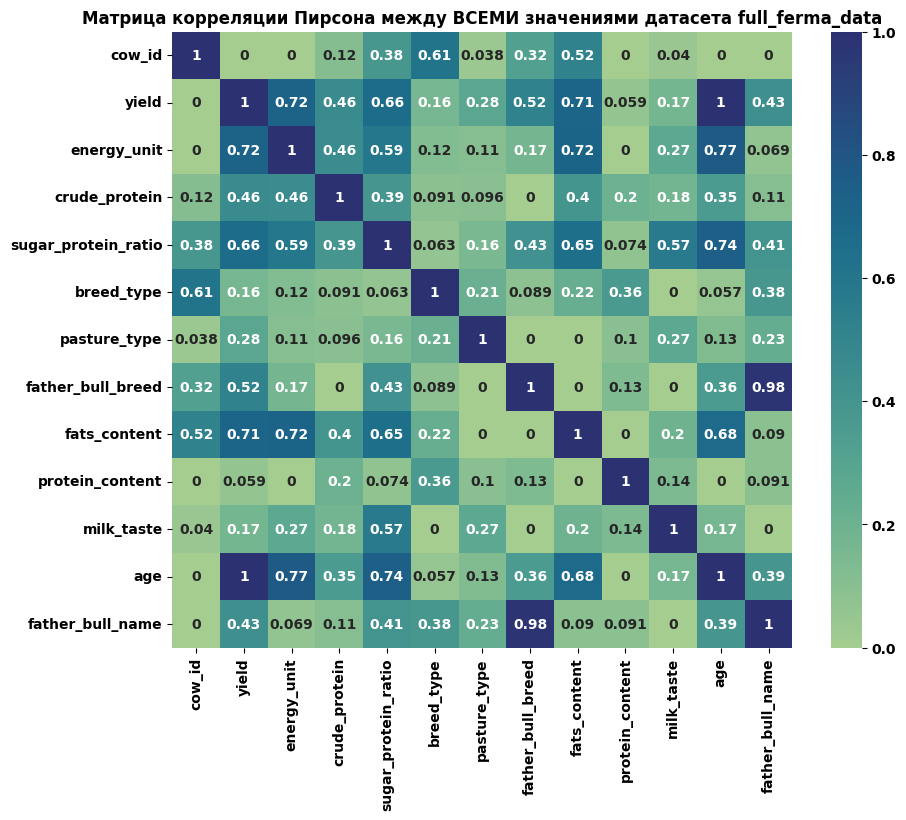

In [226]:
# исследование линейной взаимосвязи между ВСЕМИ призаками
plt.figure(figsize = (10, 8))
sns.heatmap(full_ferma_data.phik_matrix(), annot=True, cmap='crest')
plt.title('Матрица корреляции Пирсона между ВСЕМИ значениями датасета full_ferma_data', fontsize = 12)
plt.show()

In [227]:
# инициализация пользовательской функции категоризации линейной взаимосвязи
def corr_category(value):
    if value < 0.4:
        return "Слабая"
    elif value < 0.6:
        return "Умеренная"
    elif value < 0.8:
        return "Заметная"
    elif value < 0.9:
        return "Сильная"
    else:
        return "Весьма высокая"

In [228]:
# инициализация пользовательской функции формирования свода корреляции по целевым переменным
def corr_info(df : pd.DataFrame, target : str) -> None:
    corr_pivot = round(df.phik_matrix()[target]
                       .sort_values(ascending = False), 3).to_frame().drop(target, axis = 0).rename(columns = {target : target + '_corr'})
    corr_pivot['corr_category'] = corr_pivot[target + '_corr'].apply(corr_category)
    display(corr_pivot)

In [229]:
# свод информации о корреляции признаков с целевой переменной 'yield'
corr_info(full_ferma_data, 'yield')

interval columns not set, guessing: ['cow_id', 'yield', 'energy_unit', 'crude_protein', 'sugar_protein_ratio', 'fats_content', 'protein_content']


yield_corr   corr_category
age                       0.998  Весьма высокая
energy_unit               0.721        Заметная
fats_content              0.708        Заметная
sugar_protein_ratio       0.661        Заметная
father_bull_breed         0.520       Умеренная
crude_protein             0.463       Умеренная
father_bull_name          0.433       Умеренная
pasture_type              0.280          Слабая
milk_taste                0.173          Слабая
breed_type                0.165          Слабая
protein_content           0.059          Слабая
cow_id                    0.000          Слабая

In [230]:
# свод информации о корреляции признаков с целевой переменной 'milk_taste'
corr_info(full_ferma_data, 'milk_taste')

interval columns not set, guessing: ['cow_id', 'yield', 'energy_unit', 'crude_protein', 'sugar_protein_ratio', 'fats_content', 'protein_content']


milk_taste_corr corr_category
sugar_protein_ratio            0.573     Умеренная
energy_unit                    0.272        Слабая
pasture_type                   0.269        Слабая
fats_content                   0.199        Слабая
crude_protein                  0.176        Слабая
yield                          0.173        Слабая
age                            0.166        Слабая
protein_content                0.144        Слабая
cow_id                         0.040        Слабая
breed_type                     0.000        Слабая
father_bull_breed              0.000        Слабая
father_bull_name               0.000        Слабая

In [231]:
# инициализация пользовательской функции построения диаграмм рассеяния с учетом категориальных параметров
def scatter_plotting(df : pd.DataFrame, x_value : str, y_value : str, category_value : str, title : str) -> None:
    plt.figure(figsize = (8, 8))
    sns.scatterplot(data = df, x = x_value, y = y_value, hue = category_value, alpha=0.6)
    plt.title(title)
    plt.xlabel(x_value)
    plt.ylabel(y_value)
    #plt.colorbar(label=category_value)
    plt.show()

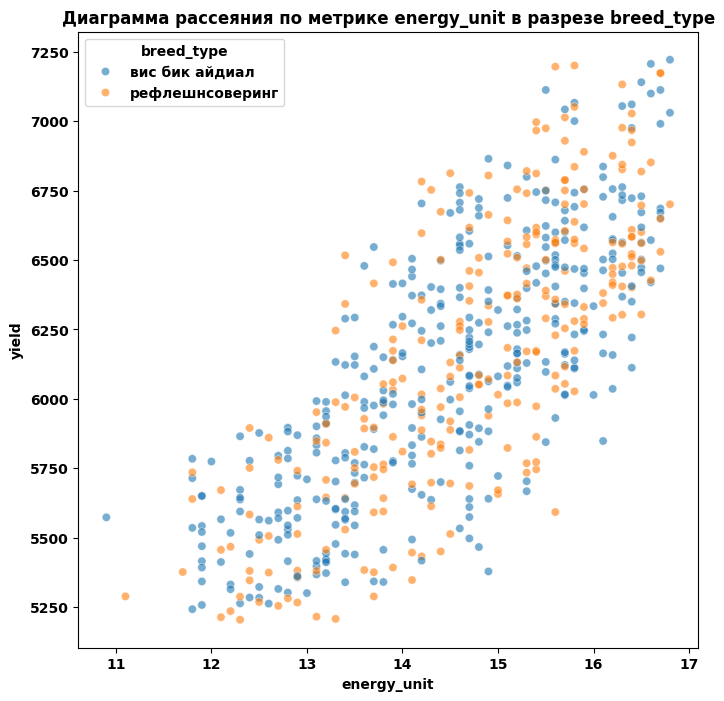

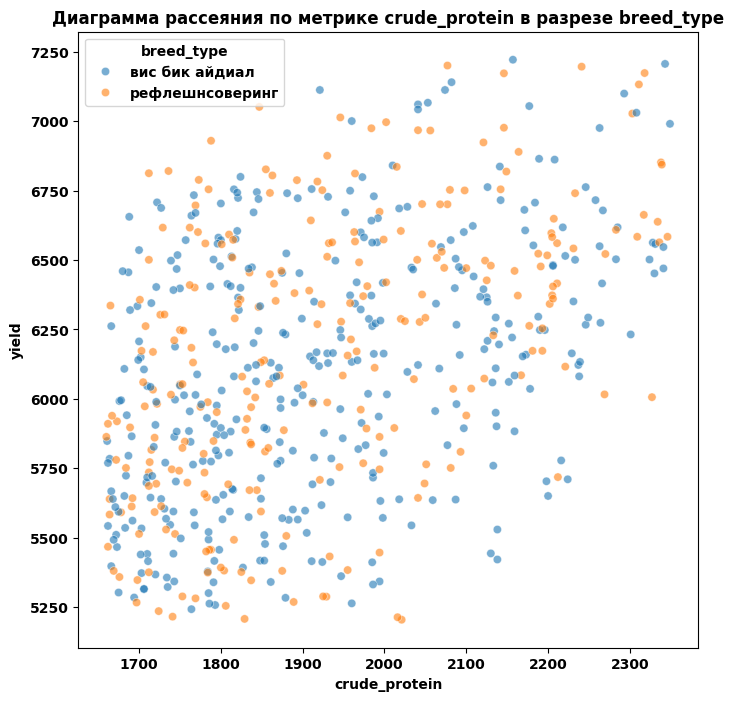

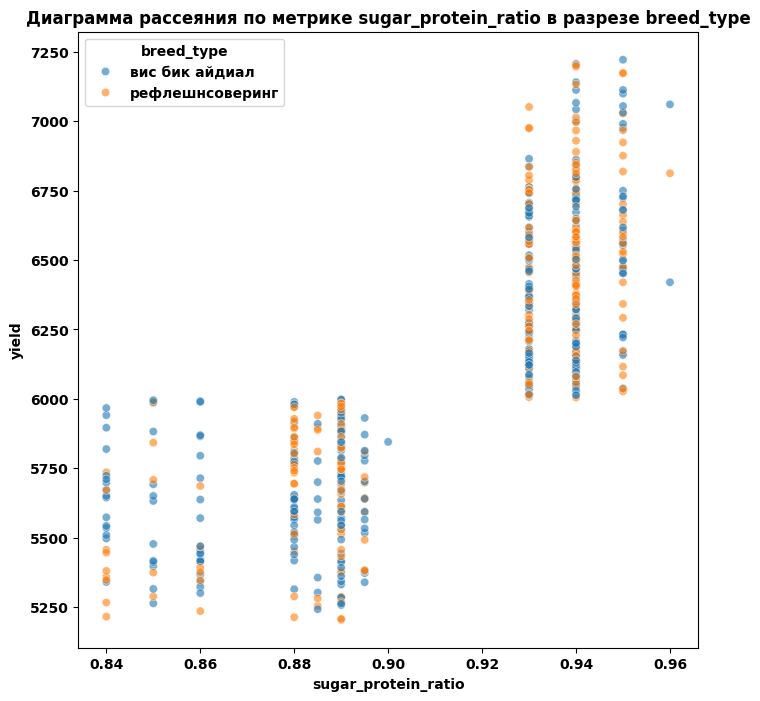

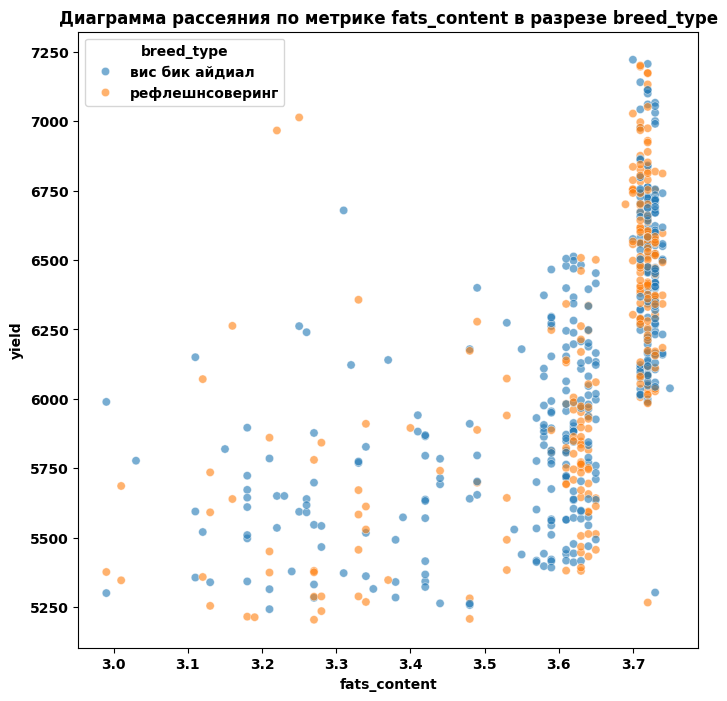

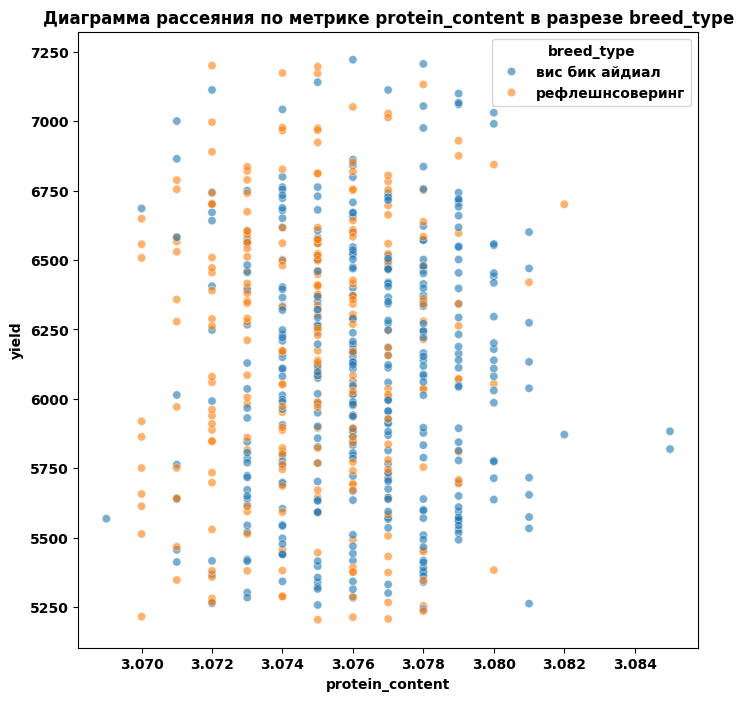

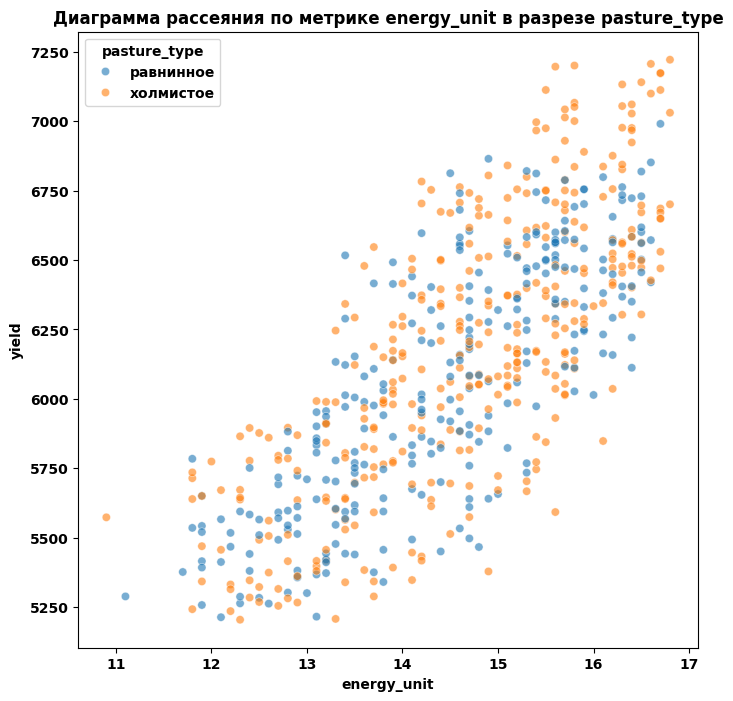

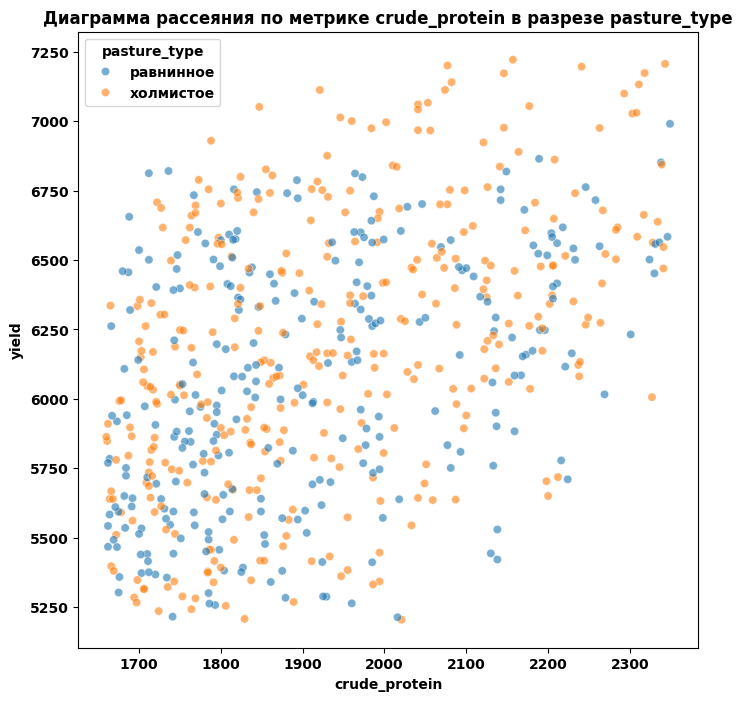

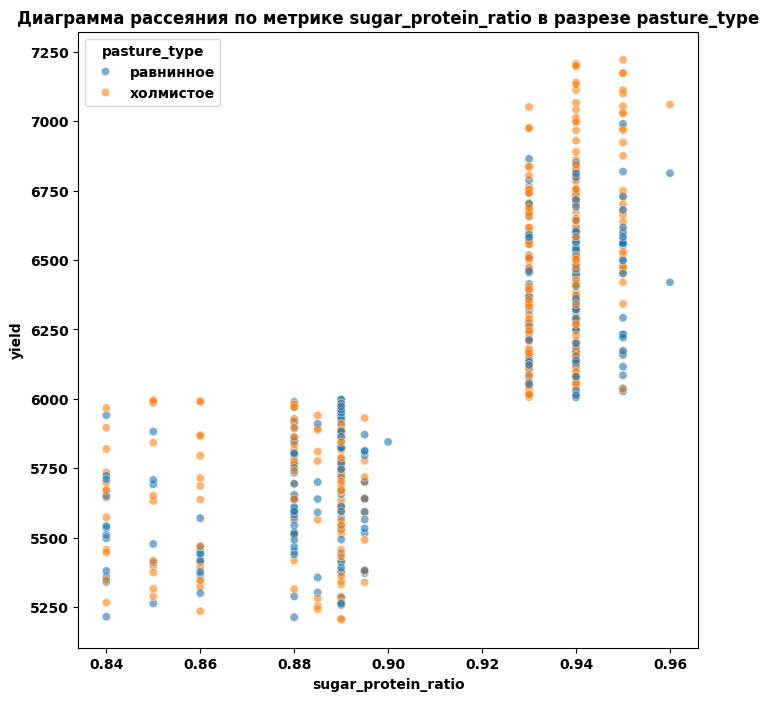

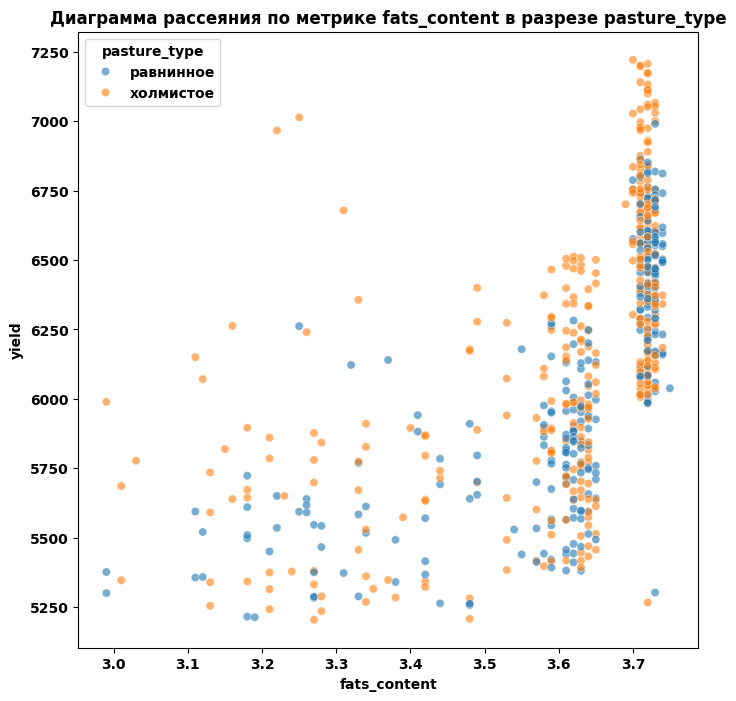

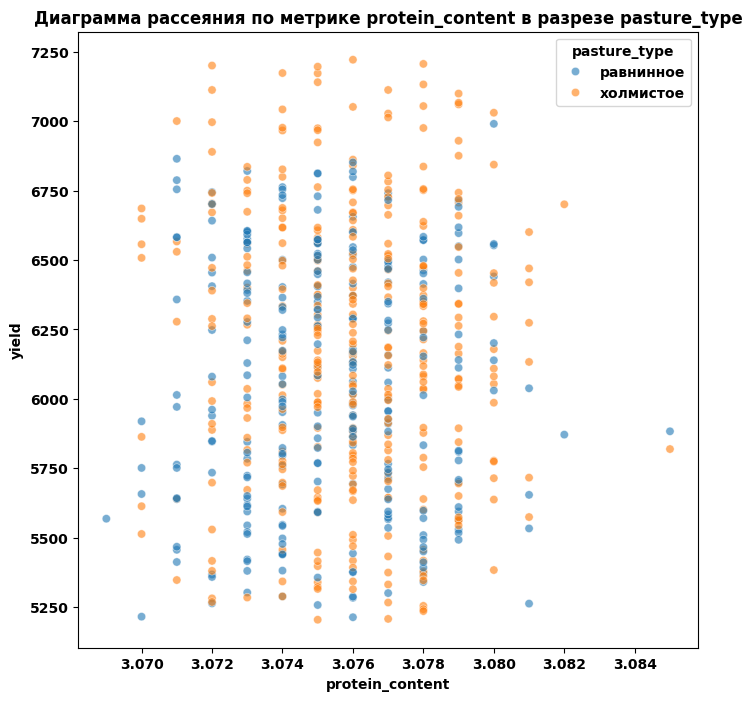

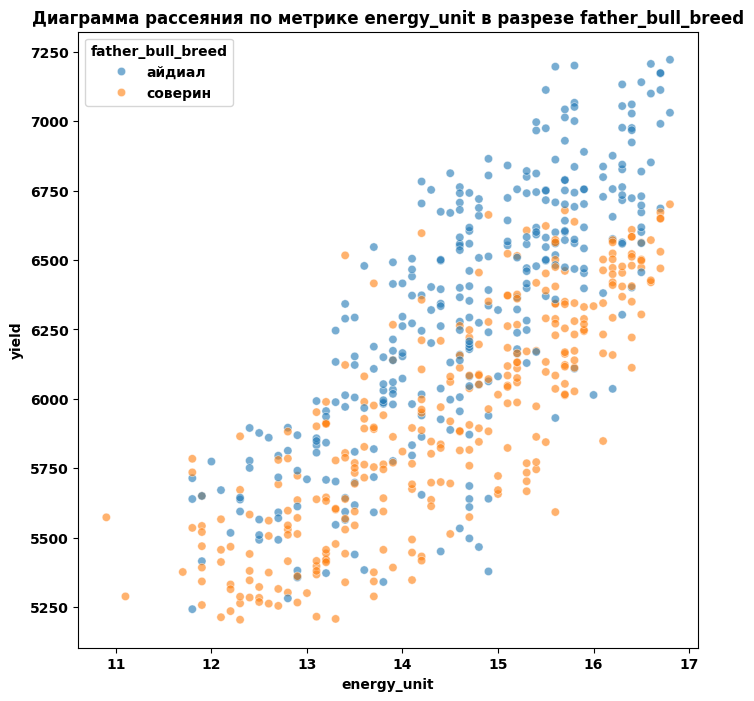

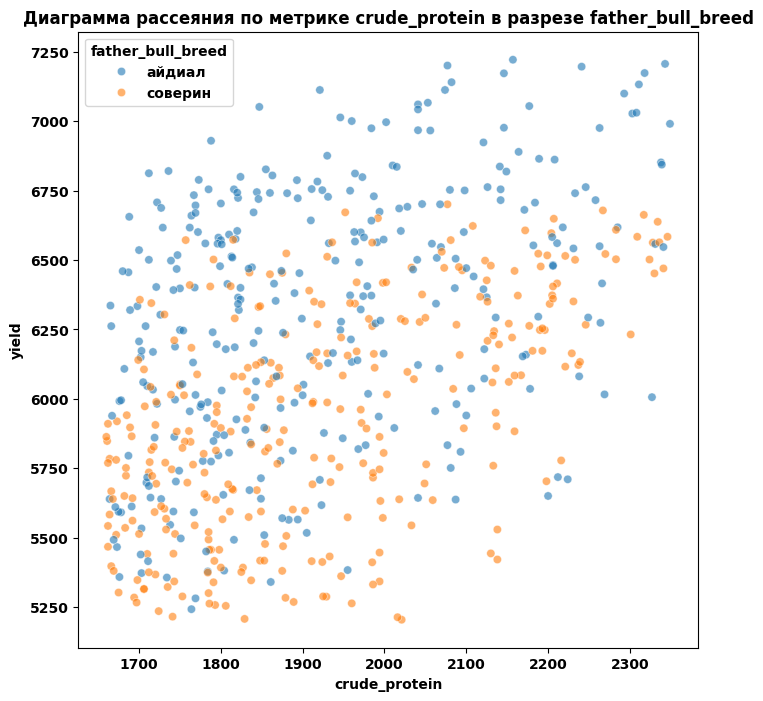

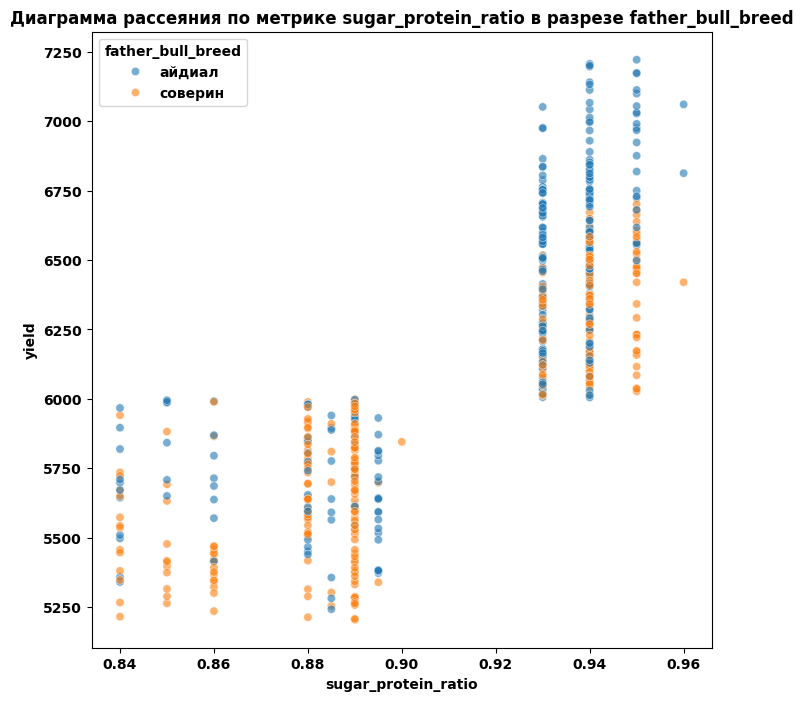

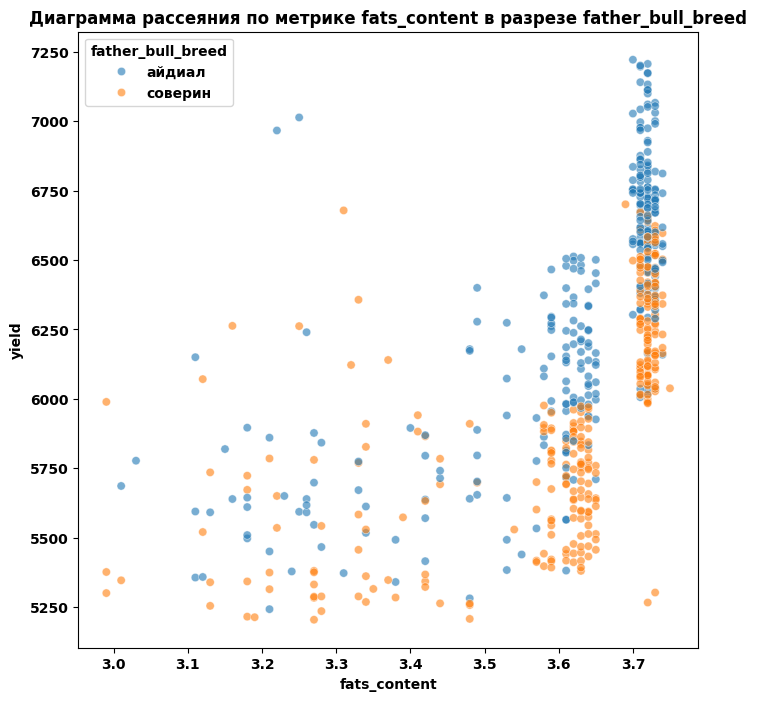

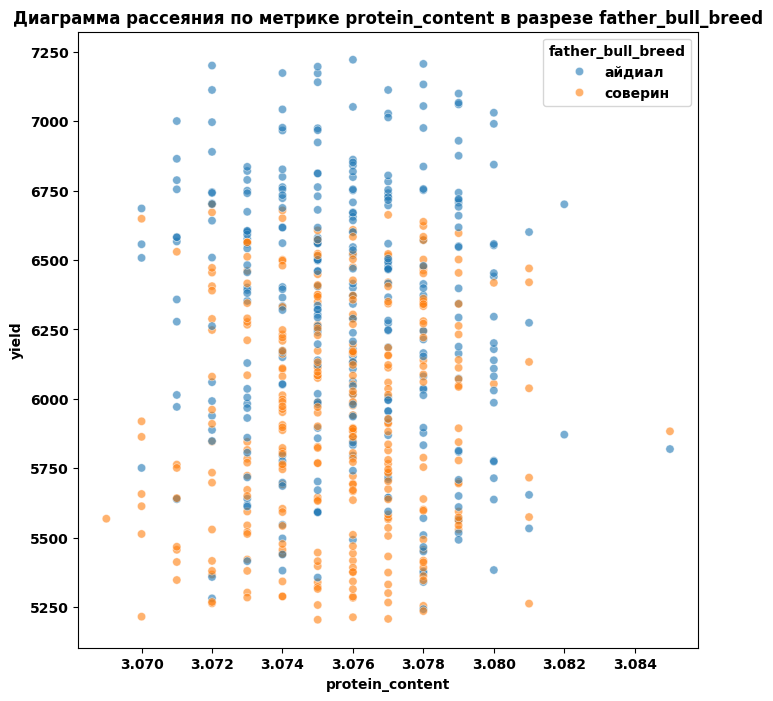

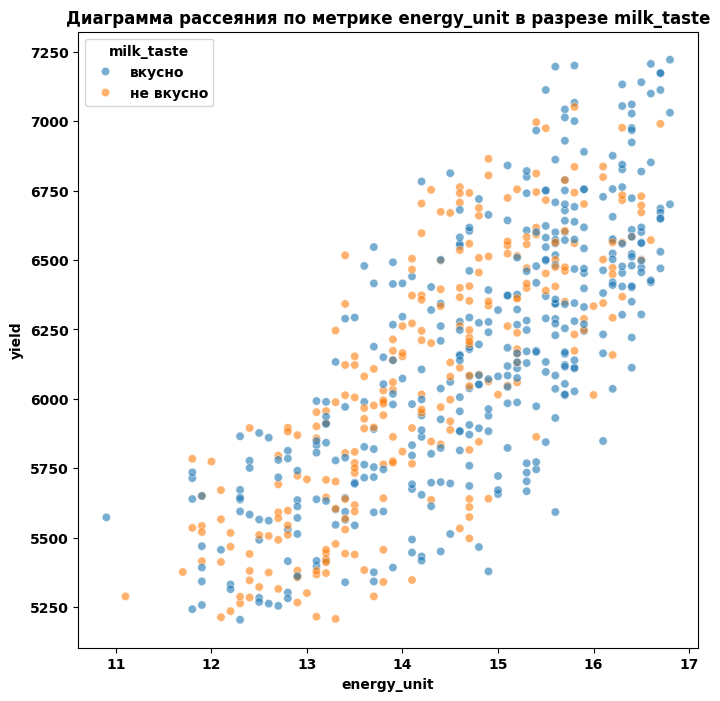

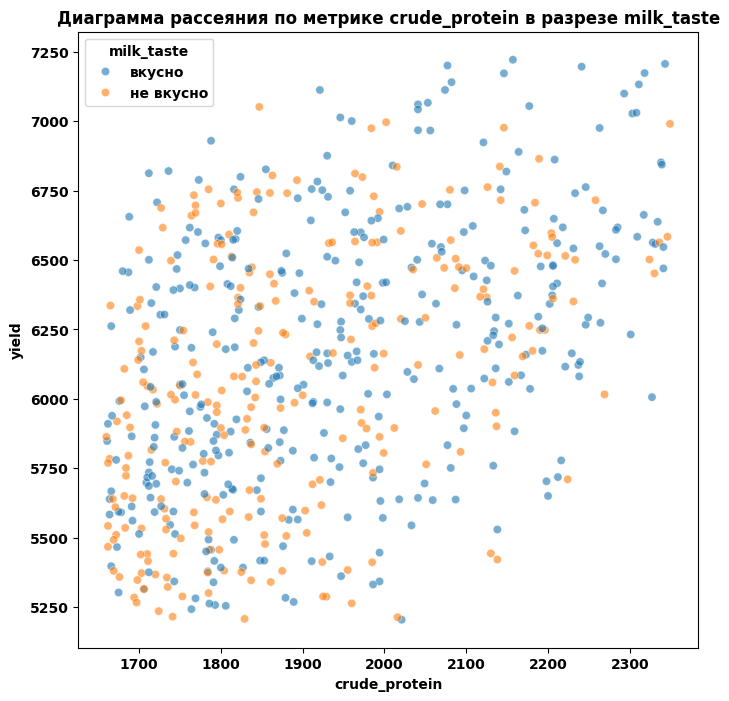

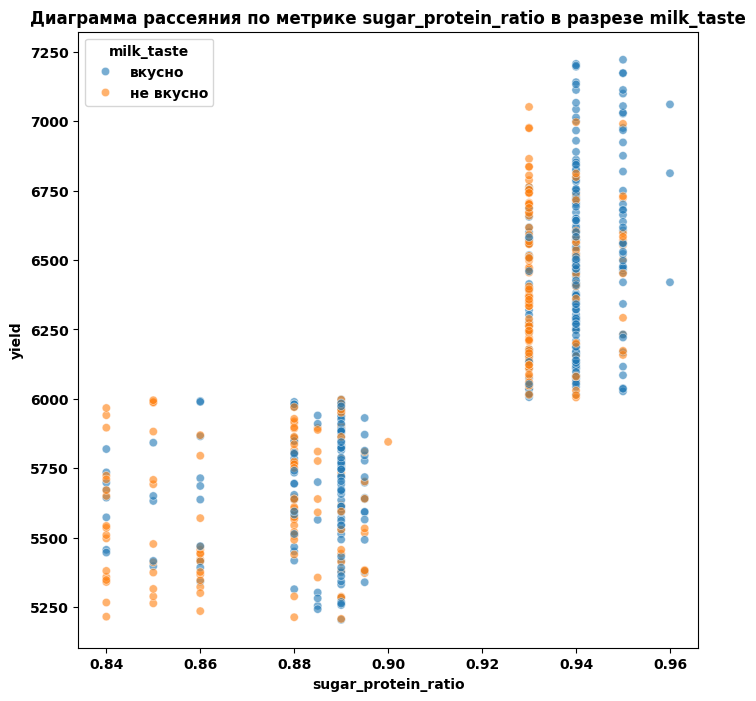

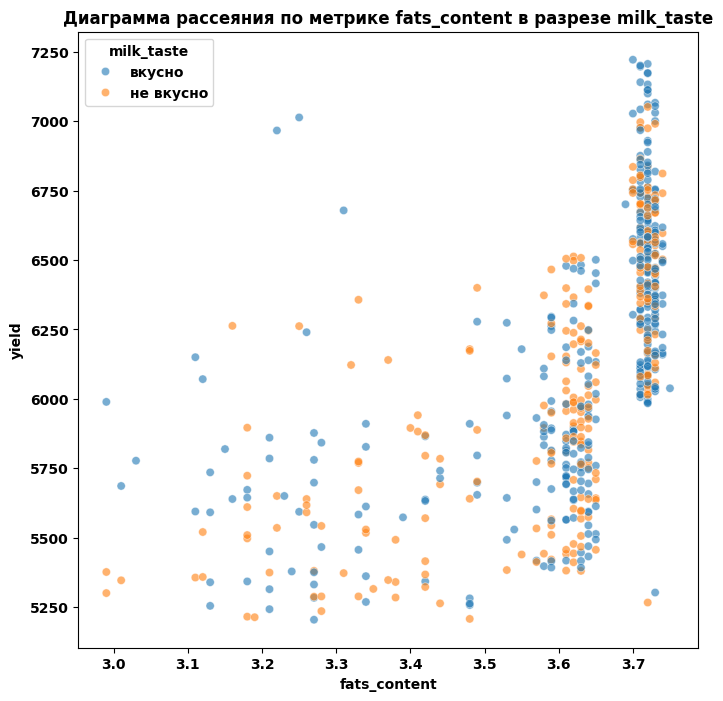

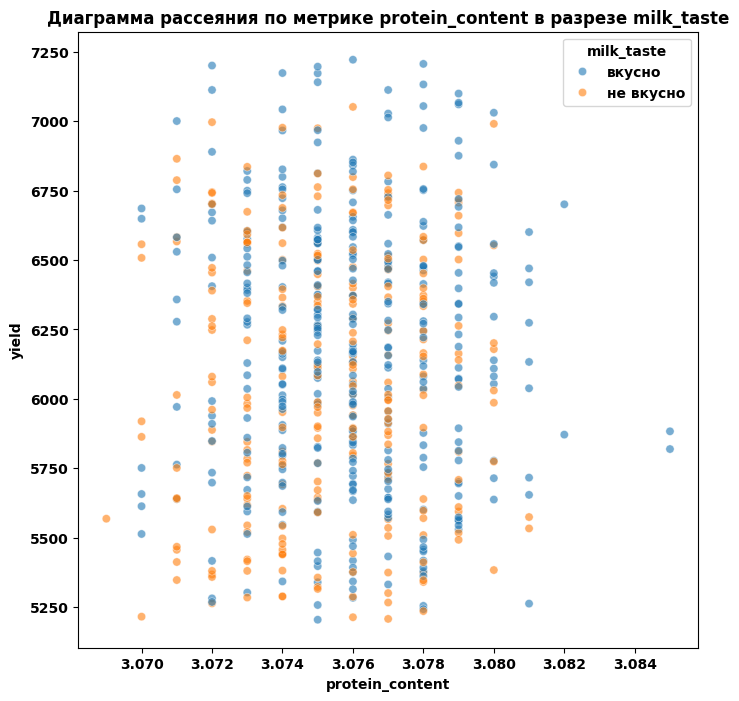

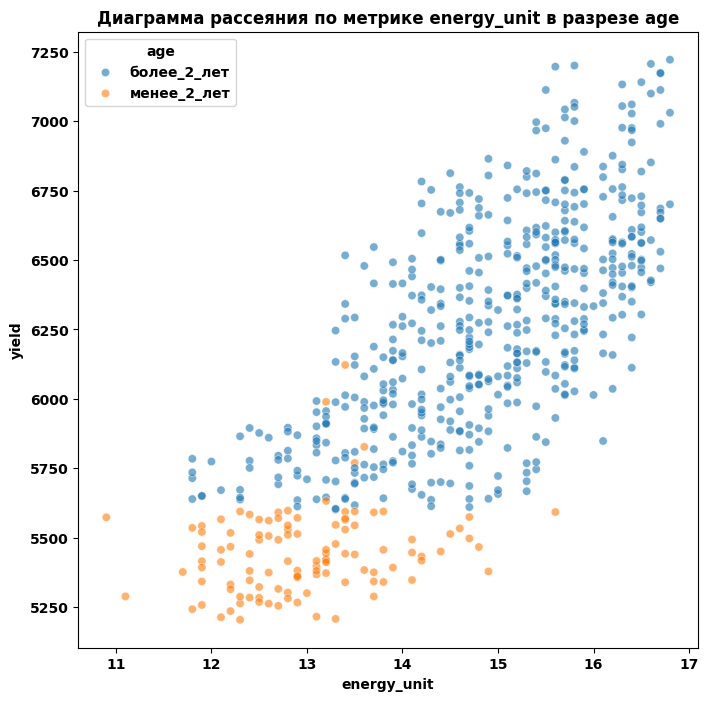

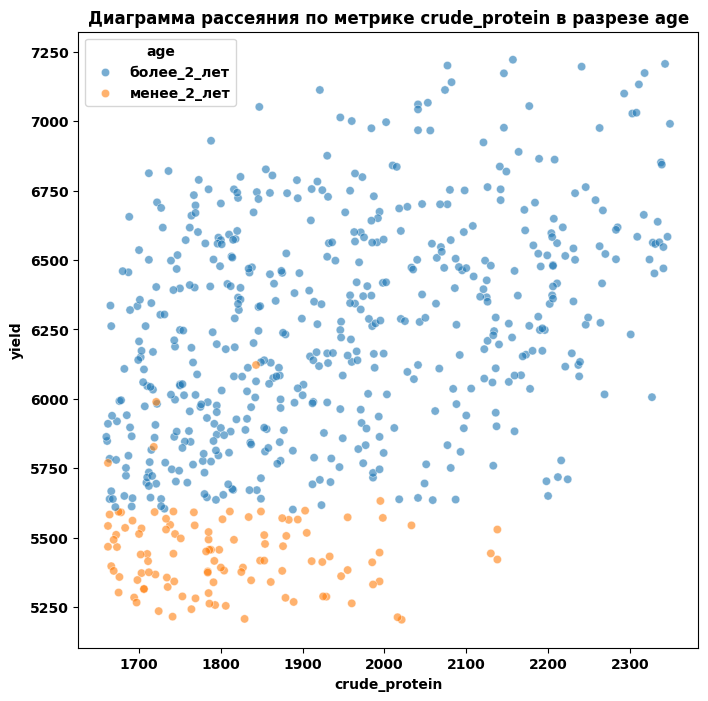

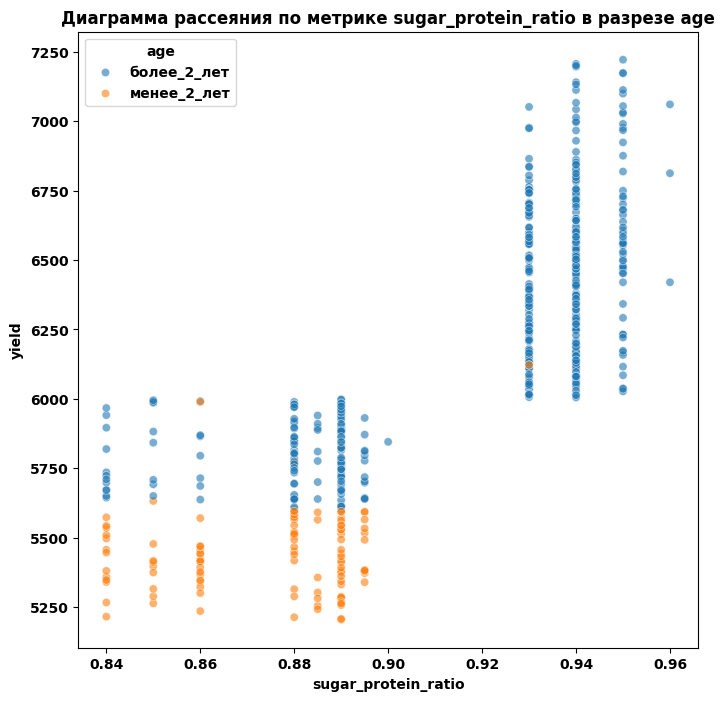

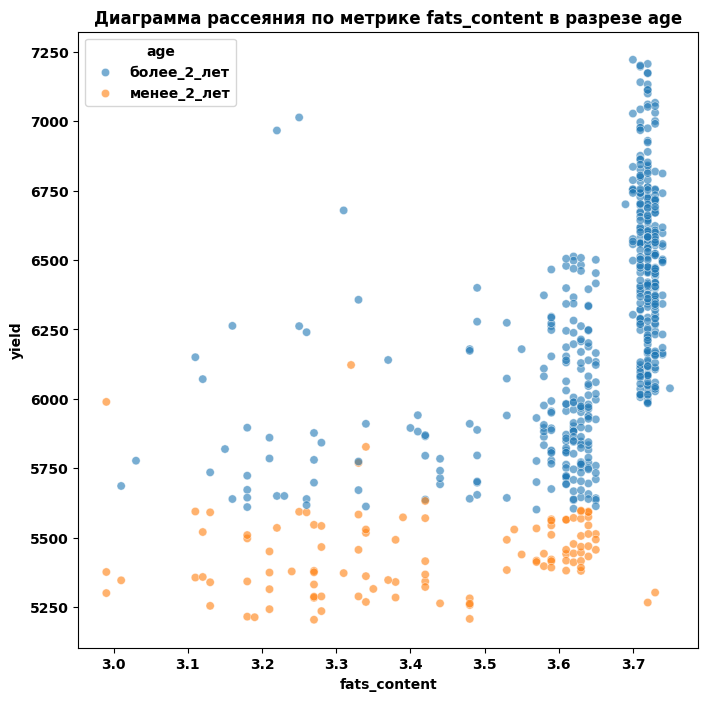

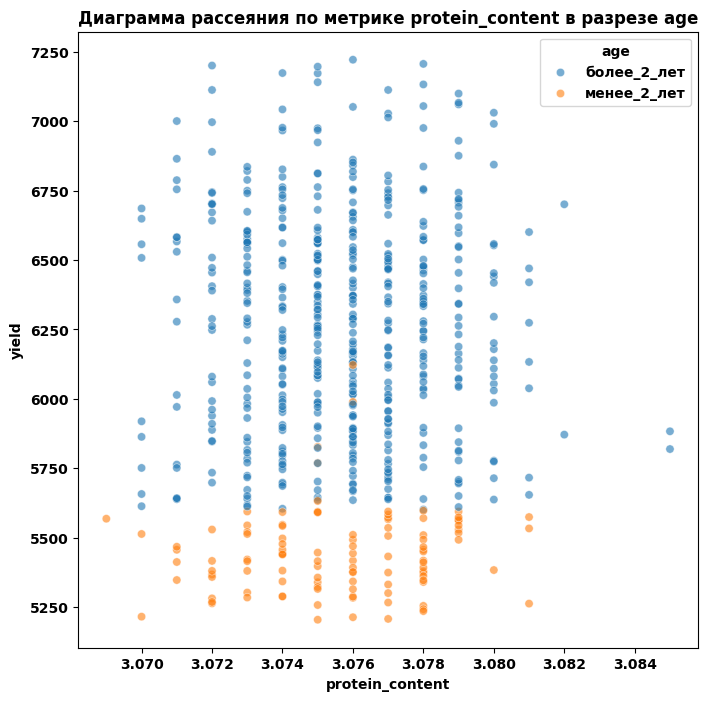

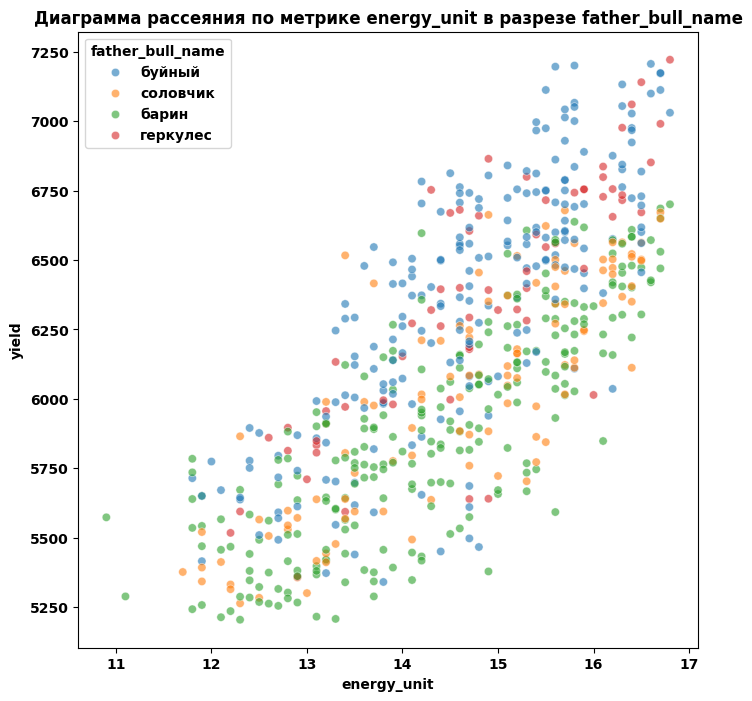

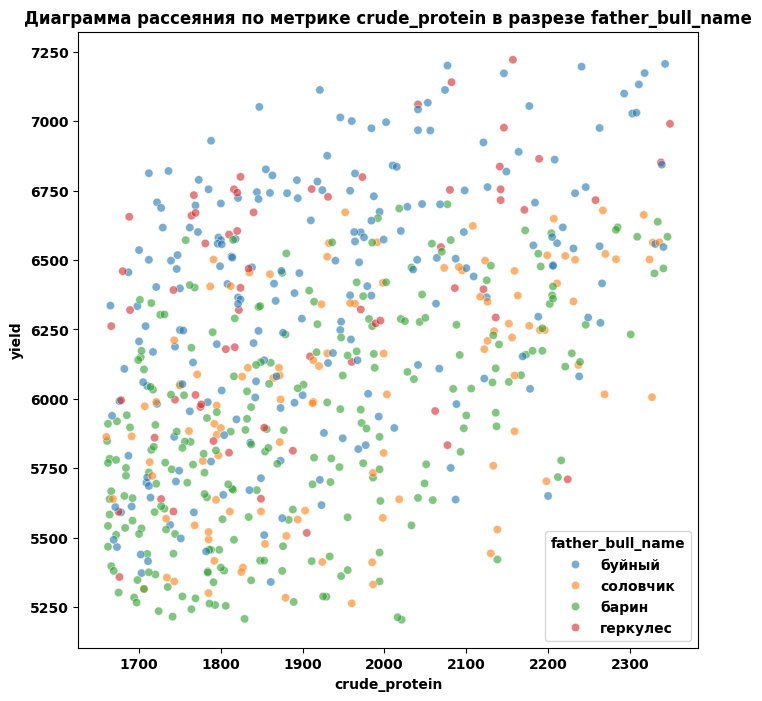

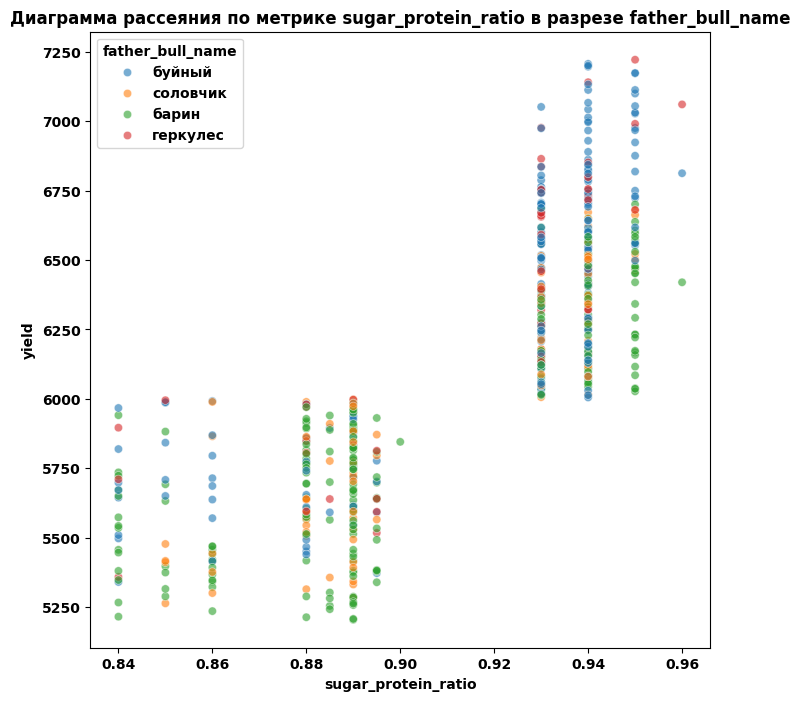

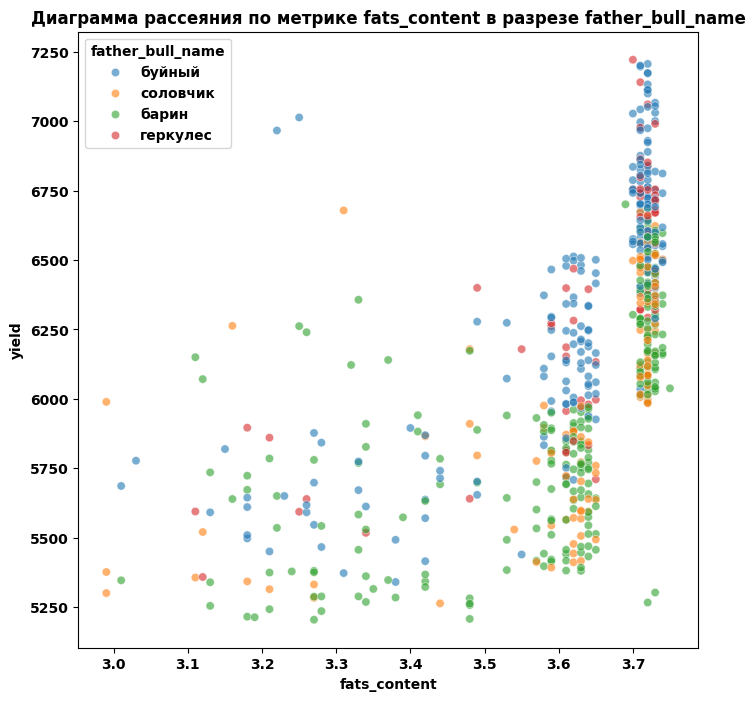

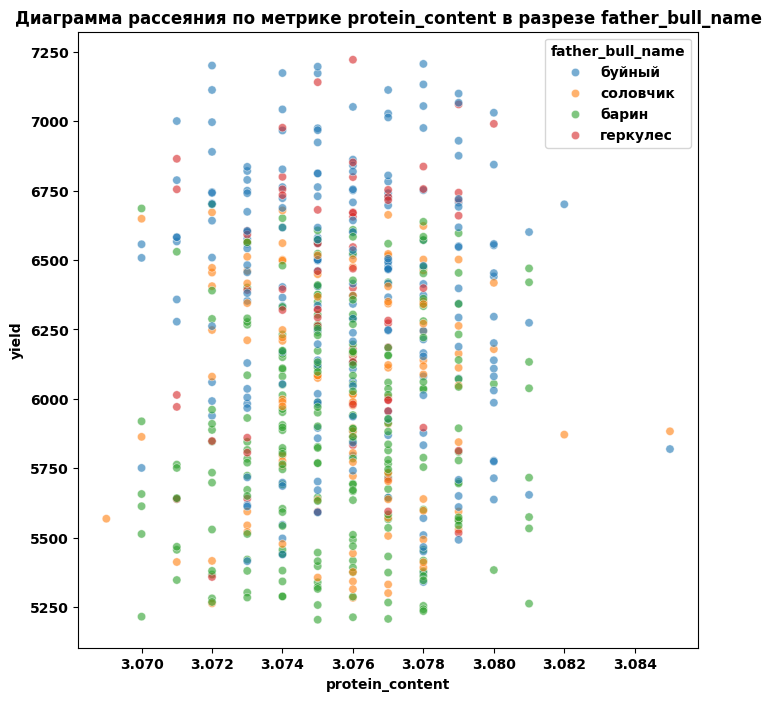

In [232]:
for cat_column in list(full_ferma_data.select_dtypes(include = 'object').columns):
    for num_column in list(full_ferma_data.select_dtypes(include = 'number').drop(['yield', 'cow_id'], axis = 1).columns):
        scatter_plotting(full_ferma_data, num_column, 'yield', cat_column, f'Диаграмма рассеяния по метрике {num_column} в разрезе {cat_column}')

**Вывод по промежуточному этапу**:

1. Анализ диаграмм рассеяния по категориальному признаку **breed_type** - порода коров:
    * **Наблюдается заметная линейная взаимосвязь** в целом между показателями удоя - **yield** - и энергетической кормовой единицей - **energy_unit** - для обеих пород;
    * **Не обнаружено четкой линейной взаимосвязи** между **yield** и **crude_protein** в зависимости от породы коров;
    * Интересная взимосвязь наблюдается между **yield** и **sugar_protein_ratio**. Как таковой **линейной взаимосвязи нет**, но при этом можно сказать, что **коровы, у которых сахаро-белковое соотношение ниже 0.9 дают количество молока менее или равное 6 000 килограмм**. **При этом, коровы, у которых сахаро-белковое соотношение выше 0.91 дают количество молока равное или более 6 000 килограмм.**. От типа породы коров характер взаимосвязи не зависит;
    * **Не обнаружено четкой линейной взаимосвязи** между **yield** и **fats_content** в зависимости от породы коров;
    * **Не обнаружено четкой линейной взаимосвязи** между **yield** и **protein_content** в зависимости от породы коров. Однако, можно сказать, что содержание белка в молоке у коров породы "Вис Бик Айдиал" выше, чем у коров породы "РефлешнСоверинг".
2. Анализ диаграмм рассеяния по категориальному признаку **breed_type** - тип пастбища:
    * Выводы по данной категории повторяют предыдущую категорию, поэтому дополнительной детализации не требуется.
3. Анализ диаграмм рассеяния по категориальному признаку **father_bull_breed** - порода быка-отца:
    * Заметно, что помимо общей связи **yield** и **energy_unit** есть и выраженная связь с породой быка-отца. **Коровы с предком породы "айдиал" дают большее количество молока, чем коровы с отцом породы "соверин"**;
    * Этот вывод так же подтверждается и графиком взаимосвязи величин **yield** и **fats_content**;
4. Анализ диаграмм рассеяния по категориальному признаку **age** - возраст коровы:
    * Наблюдается сильное разделение коров по возрасту - коровы более 2 лет дают большее количество молока, чем коровы, которым менее 2 лет. **Вероятно это можно объяснить здоровьем коров и готовностью к многократному осеменению**. Коровы менее 2 лет в силу возраста не готовы к активному оплодотворению;
5. Анализ диаграмм рассеяния по категориальному признаку **father_bull_name** - имя быка-отца:
    * Заметен следующий характер взаимосвязи между **father_bull_name** и показателем удоя - **yield**: **коровы от быка по кличке "Буйный" дают большее количества молока, чем коровы от других быков**.

In [233]:
# поиск мультиколлинеарности между независимыми переменными
print('Определитель матрицы коэффициентов корреляции:', round(np.linalg.det(full_ferma_data.select_dtypes(include = 'number').drop(['yield', 'cow_id'], axis = 1).corr().values), 2))

Определитель матрицы коэффициентов корреляции: 0.17


**Вывод по промежуточному этапу**:

**Определить мультиколлинеарность** в данных можно с помощью методов линейной алгебры - а именно, с помощью расчета **определителя матрицы**.

Если определитель матрицы равен 0, то матрица считается вырожденной - для такой матрицы не существует обратной, и есть линейная взаимосвязь между строками / столбцами матрицы.

Если определитель стремится к 0, то это означает, что в данных присутствует мультиколллинеарность. Напротив, если значение детерминанта стремится к 1, то линейная связь отсутствует.

**Значение определителя текущей матрицы позволяет сказать, что связь между признаками есть, но мультиколлинеарность отсутствует.**

**Вывод**:

1. Импортирована библиотека **phik** для поиска корреляции между ВСЕМИ признаками;
2. Изучена взаимосвязь между признаками - рассчитаны коэффициенты корреляции:
    * для признака **yield** сильная взаимосвязь наблюдается с:
        * **age** - 0.998;
        * **energy_unit** - 0.72;
        * **fats_content** - 0.7;
        * **sugar_protein_ratio** - 0.67.
    * для призака **milk_taste** заметная взаимосвязь наблюдается с:
        * **sugar_protein_ratio** - 0.57;
3. Построены диаграммы рассеяния для количественных признаков с учетом значений качественных признаков:
    * Анализ диаграмм рассеяния по категориальному признаку **breed_type** - порода коров:
        * **Наблюдается заметная линейная взаимосвязь** в целом между показателями удоя - **yield** - и энергетической кормовой единицей - **energy_unit** - для обеих пород;
        * **Не обнаружено четкой линейной взаимосвязи** между **yield** и **crude_protein** в зависимости от породы коров;
        * Интересная взимосвязь наблюдается между **yield** и **sugar_protein_ratio**. Как таковой **линейной взаимосвязи нет**, но при этом можно сказать, что **коровы, у которых сахаро-белковое соотношение ниже 0.9 дают количество молока менее или равное 6 000 килограмм**. **При этом, коровы, у которых сахаро-белковое соотношение выше 0.91 дают количество молока равное или более 6 000 килограмм.**. От типа породы коров характер взаимосвязи не зависит;
        * **Не обнаружено четкой линейной взаимосвязи** между **yield** и **fats_content** в зависимости от породы коров;
        * **Не обнаружено четкой линейной взаимосвязи** между **yield** и **protein_content** в зависимости от породы коров. Однако, можно сказать, что содержание белка в молоке у коров породы "Вис Бик Айдиал" выше, чем у коров породы "РефлешнСоверинг".
    * Анализ диаграмм рассеяния по категориальному признаку **breed_type** - тип пастбища:
        * Выводы по данной категории повторяют предыдущую категорию, поэтому дополнительной детализации не требуется.
    * Анализ диаграмм рассеяния по категориальному признаку **father_bull_breed** - порода быка-отца:
        * Заметно, что помимо общей связи **yield** и **energy_unit** есть и выраженная связь с породой быка-отца. **Коровы с предком породы "айдиал" дают большее количество молока, чем коровы с отцом породы "соверин"**;
        * Этот вывод так же подтверждается и графиком взаимосвязи величин **yield** и **fats_content**;
    * Анализ диаграмм рассеяния по категориальному признаку **age** - возраст коровы:
        * Наблюдается сильное разделение коров по возрасту - коровы более 2 лет дают большее количество молока, чем коровы, которым менее 2 лет. **Вероятно это можно объяснить здоровьем коров и готовностью к многократному осеменению**. Коровы менее 2 лет в силу возраста не готовы к активному оплодотворению;
    * Анализ диаграмм рассеяния по категориальному признаку **father_bull_name** - имя быка-отца:
        * Заметен следующий характер взаимосвязи между **father_bull_name** и показателем удоя - **yield**: **коровы от быка по кличке "Буйный" дают большее количества молока, чем коровы от других быков**.

## Построение моделей линейной регрессии <a class = 'anchor' id = 'линРег'></a>

### Первая модель линейной регрессии <a class = 'anchor' id = 'линРег_первая'></a>

Для первой модели линейной регрессии подойдет **ВЕСЬ** исходный набор `ferma_main` - эта та стартовая точка (бейзлайн), с которой начнется исследование.

---

Данный этап характеризуется следующими последовательными действиями:
1. Разделение данных на **область признаков - инициализация переменной X** - и **вектор целевой переменной - инициализация переменной y**;
2. Разбиение данных на тренировочную и тестовую выборки;
3. Кодирование категориальных признаков с помощью OneHotEncoder;
4. Масштабирование количественных признаков с помощью StandardScaler;
5. Обучение модели линейной регрессии на подготовленных данных;
6. Оцените качества модели на тестовой выборке:
    * Расчет R²;
    * Анализ остатков с помощью графиков;
    * Расчет метрики RMSE.
7. Формирование вывода по итогам данного этапа.

In [234]:
# инициализация переменных X и y для хранения области признаков и вектора целевой переменной
X = ferma_main.drop(['cow_id', 'yield'], axis = 1)
y = ferma_main['yield']

In [235]:
# инициализация переменной RANDOM_STATE
RANDOM_STATE = 42

# разбиение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

In [236]:
# список всех столбцов с категориальными значениями
cat_col_names = list(X.select_dtypes(include='object').columns)

# список всех столбцов с количественными значениями
num_col_names = list(X.select_dtypes(include='number').columns)

# инициализация переменной 'scaler'
scaler = StandardScaler()

# масштабирование количественных признаков в выборках
X_train_sc = scaler.fit_transform(X_train[num_col_names])
X_test_sc = scaler.transform(X_test[num_col_names])

# инициализация переменной 'encoder'
encoder = OneHotEncoder(sparse_output = False, drop = 'first')

# кодирование категориальных признаков
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

# список новых столбцов после кодирования признаков
encoder_col_names = encoder.get_feature_names_out()

# создание новых датафреймов после кодирования
X_train_ohe = pd.DataFrame(X_train_ohe, columns = encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns = encoder_col_names)

# создание новых датафреймов после масштабирования
X_train_sc = pd.DataFrame(X_train_sc, columns = num_col_names)
X_test_sc = pd.DataFrame(X_test_sc, columns = num_col_names)

In [237]:
# объединение наборов данных
X_train = pd.concat([X_train_ohe, X_train_sc], axis = 1)
X_test = pd.concat([X_test_ohe, X_test_sc], axis = 1)

In [238]:
# просмотр структуры обучающей выборки
X_train.head()

breed_type_рефлешнсоверинг  pasture_type_холмистое  \
0                         1.0                     1.0   
1                         1.0                     1.0   
2                         0.0                     0.0   
3                         0.0                     1.0   
4                         0.0                     0.0   

   father_bull_breed_соверин  milk_taste_не вкусно  age_менее_2_лет  \
0                        1.0                   0.0              0.0   
1                        1.0                   0.0              1.0   
2                        0.0                   1.0              0.0   
3                        0.0                   0.0              0.0   
4                        0.0                   0.0              0.0   

   energy_unit  crude_protein  sugar_protein_ratio  fats_content  \
0     1.502378       1.079523             0.837130      0.562532   
1    -1.557270      -0.196920            -0.703660     -1.601817   
2     0.125537      -1.386085            -1.011818     -2.563750   
3    -0.103937       0.752230             0.837130      0.081565   
4    -1.098323       0.828598            -0.703660      0.201807   

   protein_content  
0        -0.679069  
1        -1.452568  
2         1.254677  
3         1.254677  
4         0.094429

In [239]:
# инициализация объекта линейной регрессии
reg = LinearRegression()

# обучение линейной регрессии на обучающей выборке
reg.fit(X_train, y_train)

# получение прогнозов на тестовой выборке
predictions = reg.predict(X_test)

In [240]:
# инициализация пользовательской функции подсветки "важных" признаков
def cell_color(value):
    if value < -100:
        return 'background-color: skyblue'
    elif value > 100:
        return 'background-color: darksalmon'
    else:
        return 'background-color: white'

In [241]:
# вывод на экран "значимости" - коэффициентов - линейной регрессии
pd.DataFrame(np.array([reg.coef_]), columns = list(X_train.columns)).style.applymap(cell_color)

C:\Users\k.storozhuk\AppData\Local\Temp\ipykernel_1432\4260476185.py:2: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  pd.DataFrame(np.array([reg.coef_]), columns = list(X_train.columns)).style.applymap(cell_color)


In [242]:
# расчет метрик качества модели
print('Значение коэффициента детерминации: ', round(r2_score(y_test, predictions), 2))
print('Значение RMSE', round(mean_squared_error(y_test, predictions, squared=False), 2))

Значение коэффициента детерминации:  0.8
Значение RMSE 203.17


c:\Users\k.storozhuk\Desktop\YandexPraktikum_projects\.py_env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


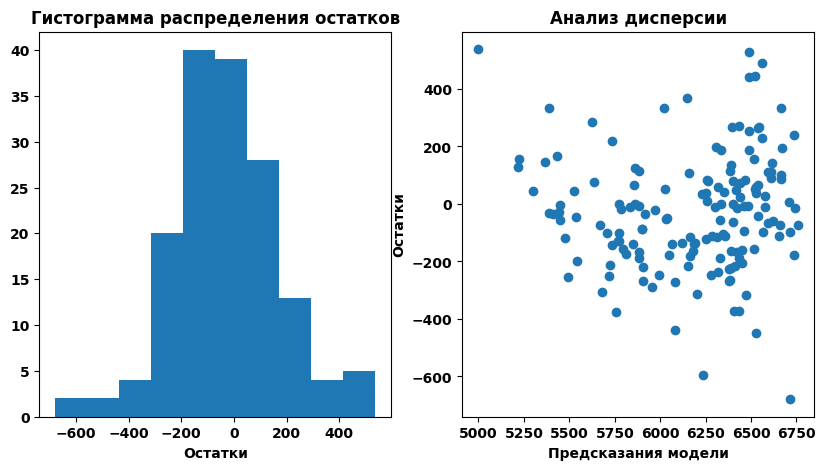

In [243]:
# инициализация переменной 'residuals' - расчет остатков
residuals = y_test - predictions

# построение визуализации для анализа остатков
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

**Вывод по промежуточному этапу**:

1. Исходные данные - датасет `ferma_main` - разделены на **область признаков - инициализация переменной X** - и **вектор целевой переменной - инициализация переменной y**;
2. Данные разбиты на тренировочную (инициализированы переменные **X_train** и **y_train**) и тестовую (инициализированы переменные **X_test** и **y_test**) выборки;
3. Проведено кодирование категориальных признаков с помощью OneHotEncoder;
4. Проведено масштабирование количественных признаков с помощью StandardScaler;
5. Обучена модель линейной регрессии на подготовленных данных - инициализирована переменная **reg**;
6. Произведена оценка качества модели на тестовой выборке:
    * **Расчет R² - 0.8.** Модель обладает неплохой обобщающей способностью: чем ближе значение коэфф-а детерминации к 1, тем лучше работает модель на новых данных;
    * **Расчет метрики RMSE - 203.17**. В среднем модель ошибается на 203.17 килограмма удоя.
7. Произведен анализ остатков:
    * **Модель ошибается в среднем на 203.17 кг в БОЛЬШУЮ сторону**, т.е. предсказывает удой БОЛЬШЕ, чем реальные значения;
    * **Дисперсия остатков имеет вид "рупора"** - разброс остатков увеличивается по мере движения в положительную сторону по оси X.

### Вторая модель линейной регрессии <a class = 'anchor' id = 'линРег_вторая'></a>

Для второй модели линейной регрессии подойдет **ВЕСЬ** исходный набор `ferma_main` + количественные признаки с изменненной взаимосвязью с целевой переменной:
    * **sugar_protein_ratio** будет преобразовано в категориальный тип данных;
    *  **fats_content** будет преобразовано в категориальный тип данных;

---

Данный этап характеризуется следующими последовательными действиями:
1. Преобразование столбца **sugar_protein_ratio** в категориальный вид;
2. Преобразование столбца **fats_content** в категориальный вид;
3. Разделение данных на **область признаков - инициализация переменной X** - и **вектор целевой переменной - инициализация переменной y**;
4. Разбиение данных на тренировочную и тестовую выборки;
5. Кодирование категориальных признаков с помощью OneHotEncoder;
6. Масштабирование количественных признаков с помощью StandardScaler;
7. Обучение модели линейной регрессии на подготовленных данных;
8. Оцените качества модели на тестовой выборке:
    * Расчет R²;
    * Анализ остатков с помощью графиков;
    * Расчет метрики RMSE.
9. Формирование вывода по итогам данного этапа.

In [244]:
# инициализация пользовательской функции для преобразования значений 'sugar_protein_ratio' в категориальный вид
# граница разделения - 0.92
def spr_convert(value):
    if value < 0.92:
        return "низкое"
    else:
        return "высокое"

In [245]:
# инициализация пользовательской функции для преобразования значений 'fats_content' в категориальный вид
# граница разделения - 3.55
def fats_convert(value):
    if value < 3.55:
        return "низкое"
    else:
        return "высокое"

In [246]:
# добавление новых столбцов в набор с данными - инициализация переменной 'ferma_main_new'
ferma_main_new = ferma_main.copy()

ferma_main_new['sqr_category'] = ferma_main_new['sugar_protein_ratio'].apply(spr_convert)
ferma_main_new['fats_category'] = ferma_main_new['fats_content'].apply(fats_convert)

ferma_main_new = ferma_main_new.drop(['fats_content', 'sugar_protein_ratio'], axis = 1)

# вывод на экран результатов преобразований
ferma_main_new.head()

cow_id  yield  energy_unit  crude_protein       breed_type pasture_type  \
0       1   5863         14.2           1743   вис бик айдиал    равнинное   
1       2   5529         12.8           2138   вис бик айдиал    равнинное   
2       3   5810         14.0           1854  рефлешнсоверинг    холмистое   
3       4   5895         12.4           2012  рефлешнсоверинг    холмистое   
4       5   5302         12.8           1675   вис бик айдиал    равнинное   

  father_bull_breed  protein_content milk_taste          age sqr_category  \
0            айдиал            3.076     вкусно  более_2_лет       низкое   
1           соверин            3.079     вкусно  менее_2_лет       низкое   
2           соверин            3.074  не вкусно  более_2_лет       низкое   
3            айдиал            3.075  не вкусно  более_2_лет       низкое   
4           соверин            3.073     вкусно  менее_2_лет       низкое   

  fats_category  
0       высокое  
1        низкое  
2       высокое  
3        низкое  
4       высокое

In [247]:
# инициализация переменных X и y для хранения области признаков и вектора целевой переменной
X = ferma_main_new.drop(['cow_id', 'yield'], axis = 1)
y = ferma_main_new['yield']

In [248]:
# инициализация переменной RANDOM_STATE
RANDOM_STATE = 42

# разбиение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

In [249]:
# список всех столбцов с категориальными значениями
cat_col_names = list(X.select_dtypes(include='object').columns)

# список всех столбцов с количественными значениями
num_col_names = list(X.select_dtypes(include='number').columns)

# инициализация переменной 'scaler'
scaler = StandardScaler()

# масштабирование количественных признаков в выборках
X_train_sc = scaler.fit_transform(X_train[num_col_names])
X_test_sc = scaler.transform(X_test[num_col_names])

# инициализация переменной 'encoder'
encoder = OneHotEncoder(sparse_output = False, drop = 'first')

# кодирование категориальных признаков
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

# список новых столбцов после кодирования признаков
encoder_col_names = encoder.get_feature_names_out()

# создание новых датафреймов после кодирования
X_train_ohe = pd.DataFrame(X_train_ohe, columns = encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns = encoder_col_names)

# создание новых датафреймов после масштабирования
X_train_sc = pd.DataFrame(X_train_sc, columns = num_col_names)
X_test_sc = pd.DataFrame(X_test_sc, columns = num_col_names)

In [250]:
# объединение наборов данных
X_train = pd.concat([X_train_ohe, X_train_sc], axis = 1)
X_test = pd.concat([X_test_ohe, X_test_sc], axis = 1)

In [251]:
# просмотр структуры обучающей выборки
X_train.head()

breed_type_рефлешнсоверинг  pasture_type_холмистое  \
0                         1.0                     1.0   
1                         1.0                     1.0   
2                         0.0                     0.0   
3                         0.0                     1.0   
4                         0.0                     0.0   

   father_bull_breed_соверин  milk_taste_не вкусно  age_менее_2_лет  \
0                        1.0                   0.0              0.0   
1                        1.0                   0.0              1.0   
2                        0.0                   1.0              0.0   
3                        0.0                   0.0              0.0   
4                        0.0                   0.0              0.0   

   sqr_category_низкое  fats_category_низкое  energy_unit  crude_protein  \
0                  0.0                   0.0     1.502378       1.079523   
1                  1.0                   1.0    -1.557270      -0.196920   
2                  1.0                   1.0     0.125537      -1.386085   
3                  0.0                   0.0    -0.103937       0.752230   
4                  1.0                   0.0    -1.098323       0.828598   

   protein_content  
0        -0.679069  
1        -1.452568  
2         1.254677  
3         1.254677  
4         0.094429

In [252]:
# инициализация объекта линейной регрессии
reg = LinearRegression()

# обучение линейной регрессии на обучающей выборке
reg.fit(X_train, y_train)

# получение прогнозов на тестовой выборке
predictions = reg.predict(X_test)

In [253]:
# инициализация пользовательской функции подсветки "важных" признаков
def cell_color(value):
    if value < -100:
        return 'background-color: skyblue'
    elif value > 100:
        return 'background-color: darksalmon'
    else:
        return 'background-color: white'

In [254]:
# вывод на экран "значимости" - коэффициентов - линейной регрессии
pd.DataFrame(np.array([reg.coef_]), columns = list(X_train.columns)).style.applymap(cell_color)

C:\Users\k.storozhuk\AppData\Local\Temp\ipykernel_1432\4260476185.py:2: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  pd.DataFrame(np.array([reg.coef_]), columns = list(X_train.columns)).style.applymap(cell_color)


In [255]:
# расчет метрик качества модели
print('Значение коэффициента детерминации: ', round(r2_score(y_test, predictions), 2))
print('Значение RMSE', round(mean_squared_error(y_test, predictions, squared=False), 2))

Значение коэффициента детерминации:  0.82
Значение RMSE 190.96


c:\Users\k.storozhuk\Desktop\YandexPraktikum_projects\.py_env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


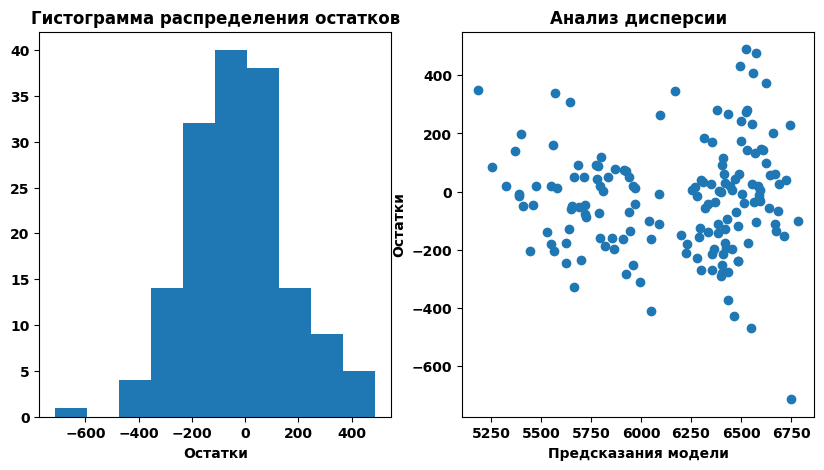

In [256]:
# инициализация переменной 'residuals' - расчет остатков
residuals = y_test - predictions

# построение визуализации для анализа остатков
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

**Вывод по промежуточному этапу**:

1. Инициализирована новая переменная `ferma_main_new`, являющаяся копией `ferma_main`
2. Преобразован столбец **sugar_protein_ratio** в категориальный вид;
3. Преобразован столбец **fats_content** в категориальный вид;
4. Исходные данные - датасет `ferma_main` - разделены на **область признаков - инициализация переменной X** - и **вектор целевой переменной - инициализация переменной y**;
5. Данные разбиты на тренировочную (инициализированы переменные **X_train** и **y_train**) и тестовую (инициализированы переменные **X_test** и **y_test**) выборки;
6. Проведено кодирование категориальных признаков с помощью OneHotEncoder;
7. Проведено масштабирование количественных признаков с помощью StandardScaler;
8. Обучена модель линейной регрессии на подготовленных данных - инициализирована переменная **reg**;
9. Произведена оценка качества модели на тестовой выборке:
    * **Расчет R² - 0.82.** Модель обладает неплохой обобщающей способностью: чем ближе значение коэфф-а детерминации к 1, тем лучше работает модель на новых данных;
    * **Расчет метрики RMSE - 190.96**. В среднем модель ошибается на 190.96 килограмма удоя.
10. Произведен анализ остатков:
    * **Модель ошибается в среднем на 190.96 кг в БОЛЬШУЮ сторону**, т.е. предсказывает удой БОЛЬШЕ, чем реальные значения;
    * **Дисперсия остатков имеет вид "рупора"** - разброс остатков увеличивается по мере движения в положительную сторону по оси X.

### Третья модель линейной регрессии <a class = 'anchor' id = 'линРег_третья'></a>

Для третьей модели линейной регрессии подойдет **ВЕСЬ** исходный набор `full_ferma_data` + количественные признаки с изменненной взаимосвязью с целевой переменной:
    * **sugar_protein_ratio** будет преобразовано в категориальный тип данных;
    *  **fats_content** будет преобразовано в категориальный тип данных;

---

Данный этап характеризуется следующими последовательными действиями:
1. Инициализация переменной `full_ferma_data_new`, которая будет являться копией `full_ferma_data`;
2. Преобразование столбца **sugar_protein_ratio** в категориальный вид;
3. Преобразование столбца **fats_content** в категориальный вид;
4. Разделение данных на **область признаков - инициализация переменной X** - и **вектор целевой переменной - инициализация переменной y**;
5. Разбиение данных на тренировочную и тестовую выборки;
6. Кодирование категориальных признаков с помощью OneHotEncoder;
7. Масштабирование количественных признаков с помощью StandardScaler;
8. Обучение модели линейной регрессии на подготовленных данных;
9. Оцените качества модели на тестовой выборке:
    * Расчет R²;
    * Анализ остатков с помощью графиков;
    * Расчет метрики RMSE.
10. Формирование вывода по итогам данного этапа.

In [257]:
# добавление новых столбцов в набор с данными - инициализация переменной 'ferma_main_new'
full_ferma_data_new = full_ferma_data.copy()

full_ferma_data_new['sqr_category'] = full_ferma_data_new['sugar_protein_ratio'].apply(spr_convert)
full_ferma_data_new['fats_category'] = full_ferma_data_new['fats_content'].apply(fats_convert)

full_ferma_data_new = full_ferma_data_new.drop(['fats_content', 'sugar_protein_ratio'], axis = 1)

# вывод на экран результатов преобразований
full_ferma_data_new.head()

cow_id  yield  energy_unit  crude_protein       breed_type pasture_type  \
0       1   5863         14.2           1743   вис бик айдиал    равнинное   
1       2   5529         12.8           2138   вис бик айдиал    равнинное   
2       3   5810         14.0           1854  рефлешнсоверинг    холмистое   
3       4   5895         12.4           2012  рефлешнсоверинг    холмистое   
4       5   5302         12.8           1675   вис бик айдиал    равнинное   

  father_bull_breed  protein_content milk_taste          age father_bull_name  \
0            айдиал            3.076     вкусно  более_2_лет           буйный   
1           соверин            3.079     вкусно  менее_2_лет         соловчик   
2           соверин            3.074  не вкусно  более_2_лет            барин   
3            айдиал            3.075  не вкусно  более_2_лет           буйный   
4           соверин            3.073     вкусно  менее_2_лет            барин   

  sqr_category fats_category  
0       низкое       высокое  
1       низкое        низкое  
2       низкое       высокое  
3       низкое        низкое  
4       низкое       высокое

In [258]:
# инициализация переменных X и y для хранения области признаков и вектора целевой переменной
X = full_ferma_data_new.drop(['cow_id', 'yield'], axis = 1)
y = full_ferma_data_new['yield']

In [259]:
# инициализация переменной RANDOM_STATE
RANDOM_STATE = 42

# разбиение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

In [260]:
# список всех столбцов с категориальными значениями
cat_col_names = list(X.select_dtypes(include='object').columns)

# список всех столбцов с количественными значениями
num_col_names = list(X.select_dtypes(include='number').columns)

# инициализация переменной 'scaler'
scaler = StandardScaler()

# масштабирование количественных признаков в выборках
X_train_sc = scaler.fit_transform(X_train[num_col_names])
X_test_sc = scaler.transform(X_test[num_col_names])

# инициализация переменной 'encoder'
encoder = OneHotEncoder(sparse_output = False, drop = 'first')

# кодирование категориальных признаков
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

# список новых столбцов после кодирования признаков
encoder_col_names = encoder.get_feature_names_out()

# создание новых датафреймов после кодирования
X_train_ohe = pd.DataFrame(X_train_ohe, columns = encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns = encoder_col_names)

# создание новых датафреймов после масштабирования
X_train_sc = pd.DataFrame(X_train_sc, columns = num_col_names)
X_test_sc = pd.DataFrame(X_test_sc, columns = num_col_names)

In [261]:
# объединение наборов данных
X_train = pd.concat([X_train_ohe, X_train_sc], axis = 1)
X_test = pd.concat([X_test_ohe, X_test_sc], axis = 1)

In [262]:
# просмотр структуры обучающей выборки
X_train.head()

breed_type_рефлешнсоверинг  pasture_type_холмистое  \
0                         1.0                     1.0   
1                         1.0                     1.0   
2                         0.0                     0.0   
3                         0.0                     1.0   
4                         0.0                     0.0   

   father_bull_breed_соверин  milk_taste_не вкусно  age_менее_2_лет  \
0                        1.0                   0.0              0.0   
1                        1.0                   0.0              1.0   
2                        0.0                   1.0              0.0   
3                        0.0                   0.0              0.0   
4                        0.0                   0.0              0.0   

   father_bull_name_буйный  father_bull_name_геркулес  \
0                      0.0                        0.0   
1                      0.0                        0.0   
2                      1.0                        0.0   
3                      1.0                        0.0   
4                      0.0                        1.0   

   father_bull_name_соловчик  sqr_category_низкое  fats_category_низкое  \
0                        1.0                  0.0                   0.0   
1                        0.0                  1.0                   1.0   
2                        0.0                  1.0                   1.0   
3                        0.0                  0.0                   0.0   
4                        0.0                  1.0                   0.0   

   energy_unit  crude_protein  protein_content  
0     1.502378       1.079523        -0.679069  
1    -1.557270      -0.196920        -1.452568  
2     0.125537      -1.386085         1.254677  
3    -0.103937       0.752230         1.254677  
4    -1.098323       0.828598         0.094429

In [263]:
# инициализация объекта линейной регрессии
reg = LinearRegression()

# обучение линейной регрессии на обучающей выборке
reg.fit(X_train, y_train)

# получение прогнозов на тестовой выборке
predictions = reg.predict(X_test)

In [264]:
# инициализация пользовательской функции подсветки "важных" признаков
def cell_color(value):
    if value < -100:
        return 'background-color: skyblue'
    elif value > 100:
        return 'background-color: darksalmon'
    else:
        return 'background-color: white'

In [265]:
# вывод на экран "значимости" - коэффициентов - линейной регрессии
pd.DataFrame(np.array([reg.coef_]), columns = list(X_train.columns)).style.applymap(cell_color)

C:\Users\k.storozhuk\AppData\Local\Temp\ipykernel_1432\4260476185.py:2: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  pd.DataFrame(np.array([reg.coef_]), columns = list(X_train.columns)).style.applymap(cell_color)


In [266]:
# расчет метрик качества модели
print('Значение коэффициента детерминации: ', round(r2_score(y_test, predictions), 2))
print('Значение RMSE', round(mean_squared_error(y_test, predictions, squared=False), 2))

Значение коэффициента детерминации:  0.83
Значение RMSE 188.74


c:\Users\k.storozhuk\Desktop\YandexPraktikum_projects\.py_env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


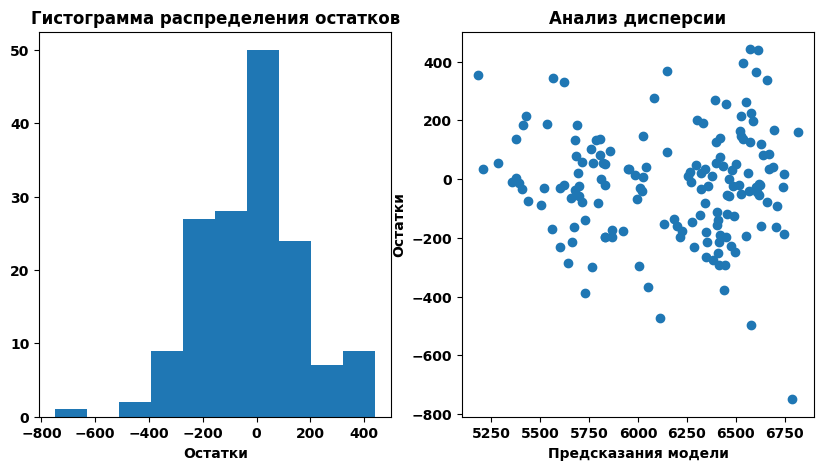

In [267]:
# инициализация переменной 'residuals' - расчет остатков
residuals = y_test - predictions

# построение визуализации для анализа остатков
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

**Вывод по промежуточному этапу**:

1. Инициализирована новая переменная `full_ferma_data_new`, являющаяся копией `full_ferma_data`
2. Преобразован столбец **sugar_protein_ratio** в категориальный вид;
3. Преобразован столбец **fats_content** в категориальный вид;
4. Исходные данные - датасет `ferma_main` - разделены на **область признаков - инициализация переменной X** - и **вектор целевой переменной - инициализация переменной y**;
5. Данные разбиты на тренировочную (инициализированы переменные **X_train** и **y_train**) и тестовую (инициализированы переменные **X_test** и **y_test**) выборки;
6. Проведено кодирование категориальных признаков с помощью OneHotEncoder;
7. Проведено масштабирование количественных признаков с помощью StandardScaler;
8. Обучена модель линейной регрессии на подготовленных данных - инициализирована переменная **reg**;
9. Произведена оценка качества модели на тестовой выборке:
    * **Расчет R² - 0.83.** Модель обладает неплохой обобщающей способностью: чем ближе значение коэфф-а детерминации к 1, тем лучше работает модель на новых данных;
    * **Расчет метрики RMSE - 188.74**. В среднем модель ошибается на 190.96 килограмма удоя.
10. Произведен анализ остатков:
    * **Модель ошибается в среднем на 188.74 кг в БОЛЬШУЮ сторону**, т.е. предсказывает удой БОЛЬШЕ, чем реальные значения;
    * **Дисперсия остатков имеет вид "рупора"** - разброс остатков увеличивается по мере движения в положительную сторону по оси X.